# **Travel Insurance Analysis: Predicting Insurance Claims for Strategic Planning**
**Ivan Robi Septian**

____________________________________________________________________________________________________________________________

## Introduction to Travel Insurance

Travel insurance is a type of insurance that provides protection during both domestic and international trips. Several companies offer travel insurance services, including AXA, Prudential, Chubb, Generali, and Sompo, among others. Many travelers consider travel insurance an essential companion due to its benefits, which protect policyholders from various risks that may occur during their journey. These benefits include:
- Medical protection and evacuation
- Compensation for baggage damage or loss
- Trip cancellation protection
- Coverage for accidents, permanent disability, death 
- And many more

#### General Terms
- Policyholder: The individual who owns the insurance policy.
- Insured: The individual or entity covered by the insurance policy.
- Premium: The amount paid by the policyholder to the insurance company for coverage.
- Claim: A request made by the insured to the insurance company for payment of benefits under the policy.
- Coverage: The amount of protection provided by the insurance policy.
- Exclusion: Specific conditions or circumstances that are not covered by the insurance policy.
- Deductible: The amount the policyholder must pay out of pocket before the insurance company pays a claim.
- Limit of Liability: The maximum amount the insurance company will pay for a covered loss.

## **Data Understanding**

The above problem will be analyzed using the **Travel Insurance** dataset. This dataset was uploaded by Zahier Nasrudin on Kaggle in 2019 and contains historical data of travel insurance users who filed claims and those who did not, based on travel insurance agencies in Singapore. The dataset can be accessed [here.](https://www.kaggle.com/datasets/mhdzahier/travel-insurance?resource=download)


### Attributes Informartion

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Agency | object | Name of agency |
| Agency Type | object | Type of travel insurance agencies |
| Distribution Channel | object | Channel of travel insurance agencies |
| Product Name | object | Name of the travel insurance products |
| Gender | object | Gender of insured |
| Duration | Int | Duration of travel |
| Destination | object | Destination of travel |
| Net Sales | Float | Amount of sales of travel insurance policies |
| Commission (in value) | Float | Commission received for travel insurance agency |
| Age | Int | Age of insured |
| Claim | Text | No – Claim status is rejected, Yes – Claim status is accepted |


## **Bussiness Problem**
Travel insurance companies generate revenue primarily through premiums paid by policyholders. These premiums are calculated based on factors such as trip duration, destination, age of the traveler, and coverage options. By pooling the premiums from many policyholders, insurance companies can cover the claims made by a few, while investing the premium funds to generate additional income. This business model allows them to manage risks effectively and remain profitable.

Travel insurance companies rely heavily on premiums paid by policyholders for revenue. These premiums are determined by factors such as trip duration, destination, traveler age, and coverage options. The challenge is to leverage machine learning to predict which policyholders are likely to file claims in the future. By doing so, insurance companies can proactively manage risks and allocate resources effectively. Furthermore, using explainable AI, the goal is to identify the key characteristics and factors influencing claim likelihood. This understanding will enable insurers to optimize pricing strategies, improve risk assessment, and enhance customer satisfaction by offering tailored insurance products.

### **Goal**

1. **Predictive Capability**: Develop a robust machine learning model that accurately predicts the likelihood of travel insurance policyholders filing claims in the future. This predictive capability will empower insurance companies to proactively manage risks, allocate resources efficiently, and improve financial planning.

2. **Explainability and Insights**: Utilize explainable AI techniques to interpret and understand the factors influencing claim likelihood. By gaining insights into these key characteristics, insurance companies can refine their underwriting processes, optimize pricing strategies, and offer personalized insurance products that better meet the needs of their customers.

By achieving these goals, travel insurance companies can enhance their operational efficiency, mitigate financial risks associated with claims, and ultimately improve customer satisfaction through tailored insurance solutions.

### **Real Case Problem**

We are analyzing a case study from FWD Singapore, a practical example of a travel insurance provider (source: [FWD](https://www.fwd.com.sg/travel-insurance/)), which offers the following financial details:
- **Premium**: S$283.55
- **Premium**: S$327,02
- **Coverage**: S$15,000
- **Promotion**: S$30 discount

By integrating these financial parameters into our dataset, we aim to evaluate the business impact of machine learning applications in the travel insurance industry. This study seeks to understand how these parameters influence predictive modeling and strategic decision-making, enhancing business outcomes and customer satisfaction.

![FWD](https://miro.medium.com/v2/resize:fit:640/format:webp/1*cjmkK7Xb6HDPSCsvOuQAig.jpeg)

## **Data Cleaning**

In [192]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
import category_encoders as ce
import lightgbm as lgb
import tensorflow as tf
import keras
import warnings
import random

from matplotlib.colors import ListedColormap
from collections import Counter

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, mean_squared_error, RocCurveDisplay, mean_absolute_percentage_error, PrecisionRecallDisplay, confusion_matrix, roc_auc_score, roc_curve, make_scorer, precision_recall_curve,average_precision_score,precision_recall_fscore_support, fbeta_score,ConfusionMatrixDisplay
from sklearn.metrics._scorer import _SCORERS
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OneHotEncoder,KBinsDiscretizer,PolynomialFeatures,LabelEncoder,FunctionTransformer

from category_encoders import BinaryEncoder
from imblearn.pipeline import Pipeline as ImblearnPipeline
from sklearn.pipeline import Pipeline as SKPipeline

from catboost import CatBoostClassifier, CatBoostRegressor

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout

warnings.filterwarnings('ignore')



In [193]:
df = pd.read_csv(r'C:\Users\ivans\OneDrive\Documents\practice\NUMPY\Practice\ML\dataset\data_travel_insurance.csv')
df.head(5).style.set_properties(**{"background-color": "#54BAB9","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.000000,54.000000,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,nan,4,MALAYSIA,10.000000,0.000000,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.000000,7.700000,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,nan,20,UNITED STATES,112.000000,0.000000,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.000000,4.000000,28,No


Through this dataset, we can differentiate the characteristics of policyholders who file claims and those who do not based on the variables mentioned above. Next, a machine learning model will be created with 'Claim' as the target variable and the other variables as features. We will then compare the model performance using all features and after performing feature selection.

### Viewing Comparison of Target Data

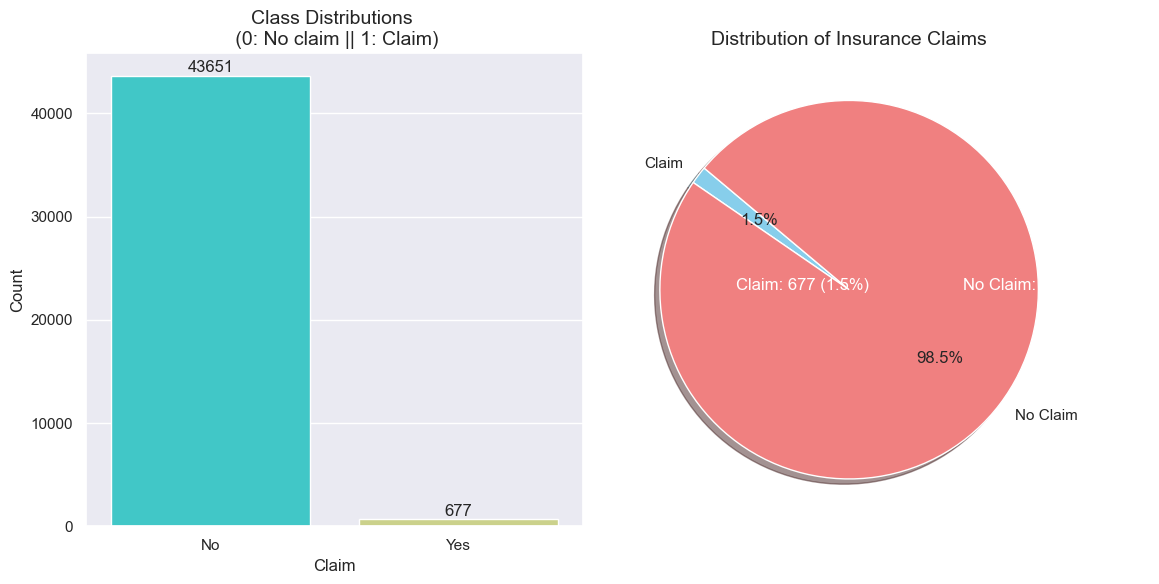

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah pemegang polis yang melakukan claim ('Yes') dan tidak melakukan claim ('No')
yes = df[df['Claim'] == 'Yes'].shape[0]
no = df[df['Claim'] == 'No'].shape[0]

# Cek persentase claim yes dan no
percent_yes = (yes / (yes + no)) * 100
percent_no = (no / (yes + no)) * 100

# Plotting dengan subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
sns.countplot(x='Claim', data=df, palette='rainbow', ax=ax1)
ax1.set_title('Class Distributions \n (0: No claim || 1: Claim)', fontsize=14)
ax1.set_ylabel('Count')

# Text di atas bar chart
ax1.text(1, yes + 50, f'{yes}', ha='center', va='bottom', fontsize=12)
ax1.text(0, no + 50, f'{no}', ha='center', va='bottom', fontsize=12)

# Pie chart
sizes = [yes, no]
labels = ['Claim', 'No Claim']
colors = ['skyblue', 'lightcoral']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('Distribution of Insurance Claims', fontsize=14)

# Text di tengah pie chart
total = yes + no
ax2.text(-0.6, 0, f'Claim: {yes} ({percent_yes:.1f}%)', fontsize=12, color='white')
ax2.text(0.6, 0, f'No Claim: {no} ({percent_no:.1f}%)', fontsize=12, color='white')

plt.tight_layout()
plt.show()


**Note:**  Notice how imbalanced is our original dataset! Most of the transactions are non-claim. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not claim. But we don't want our model to assume, we want our model to detect patterns that give signs of claim!

**Distributions:** By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

**Technical Approach:** We will not use simple oversampling techniques to avoid overfitting due to duplicating existing data. Undersampling is also not recommended because the 'Claim' data is only 677 out of 44,328 data points, which is very little. Undertaking undersampling would lead to the loss of significant information, potentially reducing the performance of the machine learning models.

However, we will explore the effectiveness of Tomek links to see how well they work. Additionally, we will attempt to combine SMOTE (Synthetic Minority Over-sampling Technique) with Tomek links to enhance sampling efficiency.

### Duplicating Dataset for EDA

In [195]:
df_eda = df.copy()
df_eda.head(5).style.set_properties(**{"background-color": "#54BAB9","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.000000,54.000000,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,nan,4,MALAYSIA,10.000000,0.000000,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.000000,7.700000,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,nan,20,UNITED STATES,112.000000,0.000000,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.000000,4.000000,28,No


We'll initially perform all exploratory data analysis and manual preprocessing on df_eda to minimize runtime overhead. This approach ensures efficiency before potentially implementing a chain algorithm on df once we've identified the optimal model. This strategy aims to streamline our initial data handling processes and focus computational resources where they're most effective in model refinement.

### Check overall data

In [196]:
pd.set_option('display.max_colwidth', None)

pd.DataFrame({
    'feature':df_eda.columns.values,
    'data_type':df_eda.dtypes.values,
    'null':df_eda.isna().mean().values * 100,
    'negative':[True if df_eda[col].dtype in [np.int64, np.float64] and (df_eda[col] < 0).any() else False for col in df_eda.columns],
    'n_unique':df_eda.nunique().values,
    'sample_unique':[df_eda[col].unique() for col in df_eda.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,Agency,object,0.000000,False,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,object,0.000000,False,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0.000000,False,2,"[Online, Offline]"
3,Product Name,object,0.000000,False,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,object,71.392799,False,2,"[F, nan, M]"
5,Duration,int64,0.000000,True,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,object,0.000000,False,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,float64,0.000000,True,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),float64,0.000000,False,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14,

Dataset consists of 44,328 rows and 11 columns/variables with 2 data types:
- 4 Numeric Variables: Duration, Net Sales, Commision (in value), Age
- 7 Categorical/Object Variables: Agency, Agency Type, Distribution Channel, Product Name, Gender, Destination, Claim

All column data types are correct. For ease of analysis and modeling, feature engineering will be conducted on categorical variables first.

There is a missing value labeled as NaN in the 'Gender' column.

The minimum value in the 'Duration' variable is -1, which should not exist as travel duration cannot be negative. 
Further investigation is needed into the maximum travel duration (4881 days or 13 years) covered by most travel insurances.

The 'Net Sales' variable contains negative values, which is normal as negative net sales can indicate loss from product sales after returns, allowances, and discounts.

There are policyholders aged over 100 years, which is rare and might be considered outliers. Further research will determine the maximum age covered by travel insurance to define outlier limits.


### Handling missing value

In [197]:
df_eda.fillna('Not Specified',inplace=True)
df_eda.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


Fill missing values in the 'Gender' column with 'Not Specified'

### Handling Negative Value on Duration

In [198]:
df_eda[df_eda['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,Not Specified,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,Not Specified,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


There are 2 instances of data with a value of 0

In [199]:
df_eda[(df_eda['Agency']=='JZI') & (df_eda['Net Sales']==18.0) & (df_eda['Destination']=='MALAYSIA') & (df_eda['Age']>100) & (df_eda['Duration'].isin([1,-1]))]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,Not Specified,-1,MALAYSIA,18.0,6.3,118,No
35891,JZI,Airlines,Online,Basic Plan,Not Specified,1,MALAYSIA,18.0,6.3,118,No


Based on the data above, it appears that a duration of -1 is equivalent to a duration of 1, as there are no other differences observed in other columns. Therefore, we will replace all instances of duration -1 with 1 to ensure consistency in the dataset.

In [200]:
# Replace values
df_eda['Duration'] = df_eda['Duration'].replace([-1], 1)

replace the value of -1 with 1 in the 'duration' column

In [201]:
# Re-check negative duration
df_eda[df_eda['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Let's check again for duration values below 0

### Check Duplicate

In [202]:
df_eda.duplicated().sum()

4668

There are 4667 duplicate data entries. We will remove them to improve the accuracy of our dataset

In [203]:
df_eda.drop_duplicates(inplace=True)
df_eda.duplicated().sum()

0

After removing the duplicate data, we will check again to ensure there are no remaining duplicates.

### Handling Outliers

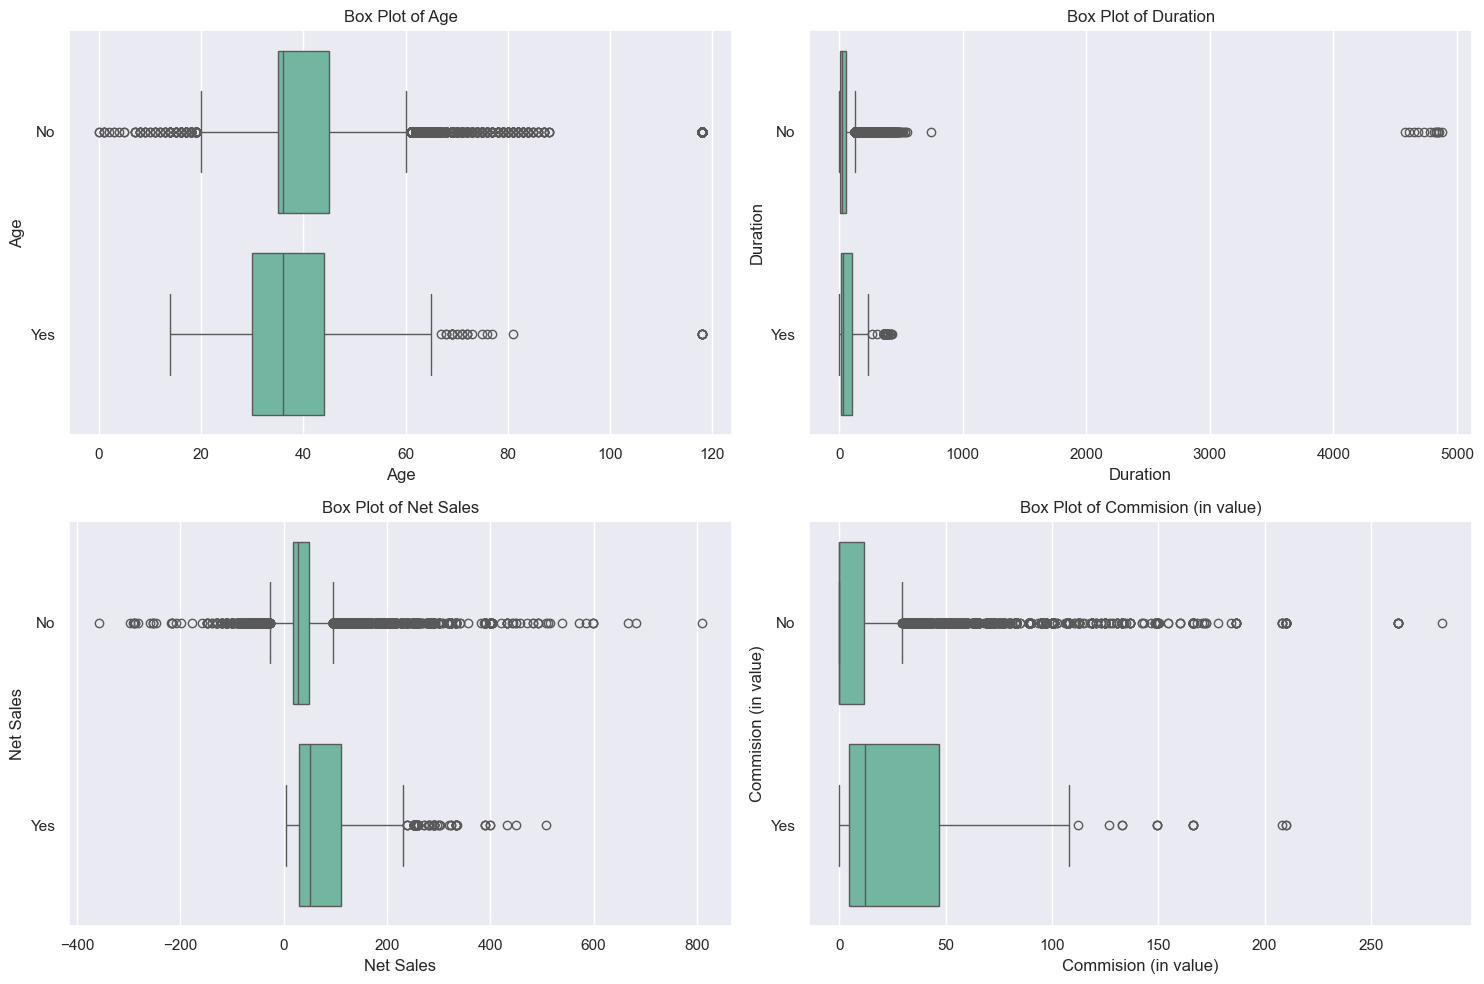

In [204]:
numerical_features = ['Age','Duration','Net Sales', 'Commision (in value)']

# Mengatur ukuran gambar
plt.figure(figsize=(15, 10))
sns.set(palette='Set2')

# Variabel untuk nomor plot
plotnumber = 1

# Iterasi melalui setiap fitur numerik untuk membuat plot
for feature in numerical_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.boxplot(x=feature, y='Claim', data=df_eda, orient='h')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature}')
    plotnumber += 1
    plt.tight_layout()

plt.show()



In [205]:
# Dictionary to store outliers' information
outliers_info = {}

for column in ['Duration', 'Net Sales', 'Commision (in value)', 'Age']:
    # Calculate quartiles
    Q1 = df_eda[column].quantile(0.25)
    Q3 = df_eda[column].quantile(0.75)
    
    # Calculate IQR and bounds
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df_eda[column] < lower_bound) | (df_eda[column] > upper_bound)
    outliers = df_eda[outliers_condition]

    # Count outliers
    num_outliers = outliers.shape[0]

    # Calculate percentage of outliers
    total_data_points = df_eda[column].shape[0]
    percentage_outliers = (num_outliers / total_data_points) * 100

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': num_outliers,  # Count of outliers
        'percentage_of_outliers': percentage_outliers,  # Percentage of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }

# Summary for outliers_summary
outliers_summary = {key: {'lower_bound': value['lower_bound'], 
                          'upper_bound': value['upper_bound'],
                          'number_of_outliers': value['number_of_outliers'],
                          'percentage_of_outliers': value['percentage_of_outliers']} 
                    for key, value in outliers_info.items()}

# Create DataFrame from 'outliers_summary'
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Display DataFrame as a styled table with all numerical values formatted to two decimal places
styled_table = outliers_summary_df.style.format({
    'lower_bound': '{:.2f}',
    'upper_bound': '{:.2f}',
    'number_of_outliers': '{}',
    'percentage_of_outliers': '{:.2f}%'
})
styled_table


,lower_bound,upper_bound,number_of_outliers,percentage_of_outliers
Duration,-58.00,126.00,3495,8.81%
Net Sales,-27.50,96.50,3597,9.07%
Commision (in value),-17.82,29.70,4084,10.30%
Age,17.50,61.50,2302,5.80%


The outliers in each column are quite significant, but we need to preserve them to maintain the fidelity of the actual data. However, for columns like duration and age, we should conduct further checks and analysis regarding these specific issues.

### Handling Anomalies

#### Age Column

In [206]:
df_eda = df_eda[df_eda['Age'] < 80]

After conducting descriptive analysis, it was found that the oldest age among travel insurance policyholders is 118 years, which is extremely rare and may be categorized as an outlier. Meanwhile, policyholders aged 0 years are reasonable as travel insurance also covers infants. Let's now check other policyholders who are above 80 years old.

Next, we will establish an outlier threshold based on the maximum age covered by travel insurance across various companies. According to insure my trip, while most travel insurance companies provide coverage for travelers up to 80 years old or younger, some offer insurance for travelers up to 100 years old. Therefore, all data of policyholders aged over 100 years will be removed.

#### Kolom Duration

In [207]:
df_eda = df_eda[df_eda['Duration'] < 547]

Another issue with the 'Duration' column is the abnormally high maximum travel durations that may not be covered by standard travel insurance policies. The coverage duration depends on the specific insurance product purchased. According to an article on Money Super Market, standard travel insurance typically covers up to 31 days, single-trip insurance covers up to 3 months (91 days), and long-term travel insurance generally covers trips lasting up to 18 months (547 days). Let's first display the data with durations above 547 days.

It appears that only the products "Ticket Protector" and "Annual Silver Plan" have customers with travel durations > 547 days. These values are significantly different from the average and median durations of the same products. Therefore, invalid duration data will be removed.

Data with a duration of 0 will not be deleted as it is considered travel lasting less than 24 hours. This is normal, for example, in cases where someone needs to travel for business to a city but return to their hometown on the same day.

#### Net Sales dan commision

Net Sales represents the net insurance sales revenue. Negative Net Sales can be defined as losses from the gross sales of insurance products, accounting for returns, allowances, and discounts.

Additional commission or bonuses provided by insurance companies to agencies typically occur when the revenue from insurance product sales meets or exceeds targets (positive Net Sales). Consequently, when a company incurs losses (negative Net Sales), it is likely that commissions to agencies are withheld (commission = 0). However, this depends on the specific agreements between the insurance company and the agencies involved. Let's further investigate to determine if we need to remove data where agencies received commissions despite having negative Net Sales.








In [208]:
# Check net sales < 0
df_eda[df_eda['Net Sales']<0].head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,-216.75,54.19,36,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,430,AUSTRALIA,-59.40,35.64,41,No
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,77,JAPAN,-29.70,17.82,59,No
199,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,29,HONG KONG,-12.00,0.00,36,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,57,AUSTRALIA,-59.40,35.64,28,No


In [209]:
# Check agensi yang tidak mendapatkan komisi saat Net Sales minus
no_com1 = df_eda[(df_eda['Net Sales']<0) & (df_eda['Commision (in value)']==0)] 
no_com1.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
199,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,29,HONG KONG,-12.0,0.0,36,No
833,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,23,SINGAPORE,-47.0,0.0,36,No
1161,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,110,NEPAL,-53.0,0.0,36,No
1419,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,33,CHINA,-50.0,0.0,36,No
1918,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,61,UNITED STATES,-68.0,0.0,19,No


In [210]:
no_com1['Agency'].unique()

array(['EPX'], dtype=object)


It appears there are 469 rows with negative Net Sales: 133 of these are instances where agencies did not receive commissions despite negative Net Sales, all of which belong to agency EPX. This means the remaining 336 rows are instances where agencies received commissions despite having negative Net Sales. Let's further investigate this.

In [211]:
# Check agensi yang mendapatkan komisi saat Net Sales minus
agency_1 = df_eda[(df_eda['Net Sales']<0) & (df_eda['Commision (in value)'] > 0)] 
agency_1.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,-216.75,54.19,36,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,430,AUSTRALIA,-59.40,35.64,41,No
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,77,JAPAN,-29.70,17.82,59,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,57,AUSTRALIA,-59.40,35.64,28,No
601,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,15,AUSTRALIA,-19.80,11.88,23,No


In [212]:
agency_1['Agency'].unique()

array(['C2B', 'CWT', 'JZI', 'ADM', 'ART', 'LWC', 'KML', 'TST', 'RAB'],
      dtype=object)


It turns out that agencies C2B, CWT, JZI, ADM, ART, LWC, KML, TST, and RAB still receive commissions even when Net Sales are negative. Now let's check the agencies that receive commissions versus those that do not when Net Sales are not negative.

In [213]:
# Check agency yang tidak mendapatkan komisi saat net sales plus
agency_2 = df_eda[(df_eda['Net Sales']>0) & (df_eda['Commision (in value)']==0)] 
agency_2.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4,MALAYSIA,10.0,0.0,33,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20,UNITED STATES,112.0,0.0,59,No
5,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,2,SINGAPORE,10.0,0.0,36,No
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,Not Specified,25,"KOREA, REPUBLIC OF",50.0,0.0,36,No
7,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,90,SINGAPORE,78.0,0.0,22,No


In [214]:
agency_2['Agency'].unique()

array(['EPX', 'TTW'], dtype=object)

In [215]:
# Check agency yang mendapatkan komisi saat net sales plus
agency_2 = df_eda[(df_eda['Net Sales']>0) & (df_eda['Commision (in value)']>0)] 
agency_2.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.7,39,No
11,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,216.0,54.0,27,No


In [216]:
agency_2['Agency'].unique()

array(['C2B', 'JZI', 'CWT', 'LWC', 'ART', 'CSR', 'RAB', 'KML', 'SSI',
       'TST', 'ADM', 'CCR', 'CBH'], dtype=object)

- Non-commission Agencies: There are 20,552 data points where agencies EPX and TTW did not receive a commission when net sales were positive. Therefore, it can be concluded that EPX does not receive commissions under either condition.
- Commission Agencies: Agencies C2B, JZI, CWT, LWC, ART, CSR, RAB, KML, SSI, TST, ADM, CCR, and CBH receive commissions when net sales are positive. Consequently, it can be inferred that agencies C2B, CWT, JZI, ADM, ART, LWC, KML, TST, and RAB receive commissions under both conditions.
- Non-negative Net Sales: Net sales were never negative when products were marketed by agencies CSR, SSI, CCR, CBH, and TTW. Therefore, it is not possible to predict how the commission system operates when net sales are negative for these agencies.

In [217]:
# jumlah data pemegang polis yang melakukan pembelian asuransi di tiap agency
group = df_eda.groupby('Agency')[['Agency']].size().reset_index().rename(columns = {0 : 'Count'}).sort_values(by = 'Count', ascending=False)
group.head(5)

,Agency,Count
7,EPX,20951
6,CWT,5725
2,C2B,5465
8,JZI,4235
12,SSI,691


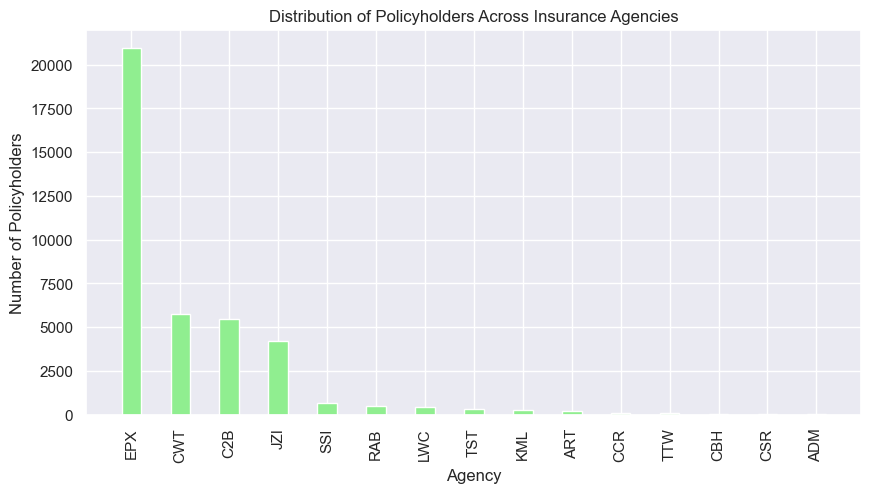

In [218]:
# Group by 'Agency' and count the number of occurrences
df_agen = df_eda.groupby(by=['Agency']).size().reset_index(name='counts')

# Sort the DataFrame by 'counts' in descending order
df_agen = df_agen.sort_values(by='counts', ascending=False)

# Plot the data
fig = plt.figure(figsize=(10, 5))
plt.bar(df_agen['Agency'], df_agen['counts'], color='lightgreen', width=0.4)
plt.xlabel('Agency')
plt.ylabel('Number of Policyholders')
plt.title('Distribution of Policyholders Across Insurance Agencies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


Conclusion: The provision of commissions or additional compensation by insurance companies to travel agents depends on agreements made between both parties. Therefore, it is reasonable to find some companies that show positive net sales (profit) but do not provide commissions to agencies, while others continue to provide commissions even when net sales are negative.

The largest number of policyholders are found under agency EPX, totaling up to 20,961 records. EPX does not receive commissions whether net sales are positive or negative. Therefore, we will not delete data for agencies that still receive commissions when net sales are negative, as a significant portion of them are EPX data, and deleting them would result in losing valuable information.

#### Duplicated feature

In [219]:
duplicated_rows = df_eda[df_eda.duplicated(subset=df_eda.columns.difference(['Claim']), keep=False)]

# Group by all columns except 'Claim' and filter rows where 'Claim' has different values
groups = duplicated_rows.groupby(by=df_eda.columns.difference(['Claim']).tolist())
count = 0
for key, group in groups:
    if group['Claim'].nunique() > 1:
        display(group)
        print()
        count += 1
        if count == 4:
            break

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
11678,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,23.5,5.88,25,Yes
37811,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,23.5,5.88,25,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
14213,C2B,Airlines,Online,Bronze Plan,F,10,SINGAPORE,27.0,6.75,26,Yes
27110,C2B,Airlines,Online,Bronze Plan,F,10,SINGAPORE,27.0,6.75,26,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
16812,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,187.85,46.96,26,Yes
33405,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,187.85,46.96,26,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2561,C2B,Airlines,Online,Bronze Plan,F,5,SINGAPORE,16.0,4.0,29,Yes
26342,C2B,Airlines,Online,Bronze Plan,F,5,SINGAPORE,16.0,4.0,29,No


We need to handle cases where all features are the same but have different claim outcomes. Due to our highly imbalanced data, we tend to delete instances in the majority class.

In [220]:
# Filter rows where 'Claim' is 'Yes' and all other columns are identical except 'Claim'
duplicated_rows = df_eda[df_eda.duplicated(subset=df_eda.columns.difference(['Claim']), keep=False)]
filtered_rows = duplicated_rows[duplicated_rows['Claim'] == 'Yes']

# Count the occurrences
count = filtered_rows.shape[0]

print("Number of rows where all columns except 'Claim' are identical but 'Claim' is 'Yes':", count)# Filter rows where 'Claim' is 'Yes' and all other columns are identical except 'Claim'

Number of rows where all columns except 'Claim' are identical but 'Claim' is 'Yes': 62


In [221]:
duplicated_rows = df_eda[df_eda.duplicated(subset=df_eda.columns.difference(['Claim']), keep=False)]
filtered_rows = duplicated_rows[duplicated_rows['Claim'] == 'No']
df_eda.drop(filtered_rows.index, inplace=True)
print("Number of rows where all columns except 'Claim' are identical but 'Claim' is 'Yes':", count)# Filter rows where 'Claim' is 'Yes' and all other columns are identical except 'Claim'

Number of rows where all columns except 'Claim' are identical but 'Claim' is 'Yes': 62


#### Recheck duplicate, null value, data type dan imbalance data

In [222]:
# Recheck Null
data_null = df_eda.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
data_null['null percentage'] = data_null['null count'].apply(lambda x: (x/(df_eda.shape[0]))*100)
data_null.head(5)

,variable,null count,null percentage
0,Agency,0,0.0
1,Agency Type,0,0.0
2,Distribution Channel,0,0.0
3,Product Name,0,0.0
4,Gender,0,0.0


There are no null values.

In [223]:
# Re-check duplicate 
duplicate = df_eda.duplicated()
df_eda[duplicate].head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim


There are no duplicated

In [224]:
df_eda.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No
5,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,2,SINGAPORE,10.0,0.0,36,No
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,Not Specified,25,"KOREA, REPUBLIC OF",50.0,0.0,36,No
7,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,90,SINGAPORE,78.0,0.0,22,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.7,39,No
9,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,24,GERMANY,80.0,0.0,36,No


## **Exploratory Data Analysis**

### Analisis korelasi antar variabel

In [225]:
# Assuming 'Claim' column has values 'Yes' and 'No'
# Convert 'Claim' column to binary values
df_eda['Claim_Binary'] = df_eda['Claim'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate Spearman correlation matrix
corr_all = df_eda[['Claim_Binary', 'Duration', 'Age', 'Net Sales', 'Commision (in value)']].corr(method='spearman')

# Drop the temporary binary column
df_eda.drop(columns=['Claim_Binary'], inplace=True)

# Display the correlation matrix
corr_all


,Claim_Binary,Duration,Age,Net Sales,Commision (in value)
Claim_Binary,1.000000,0.042949,-0.027537,0.091738,0.100142
Duration,0.042949,1.000000,-0.019661,0.253513,0.097051
Age,-0.027537,-0.019661,1.000000,0.001825,0.120673
Net Sales,0.091738,0.253513,0.001825,1.000000,0.267341
Commision (in value),0.100142,0.097051,0.120673,0.267341,1.000000


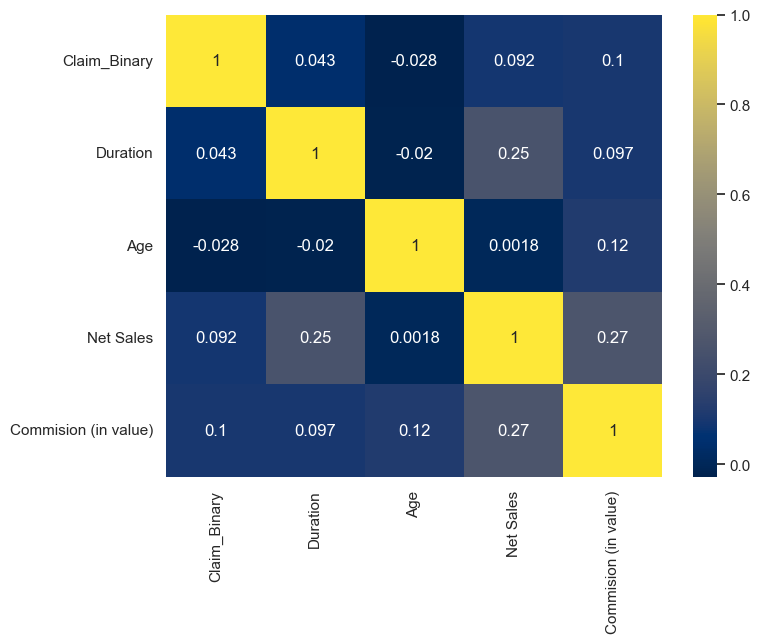

In [226]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_all,annot = True,cmap='cividis')
plt.show()

It appears that the majority of variables have minimal impact on claims, with correlations mostly below 0.1. The column 'Distribution Channel' shows the least influence on claims. 'Duration', 'Net Sales', and 'Commission (in value)' have a positive impact on claims, while others have a negative impact, implying:

- The longer the travel duration, the higher the likelihood of a claim.
- Higher net sales correlate with increased claim likelihood. This can be attributed to higher product sales resulting in higher net sales and increased chances of claims.
- Similarly, commission correlates positively with net sales, as indicated by their correlation of 0.27.
- The column 'Agency Type' (Travel Agency) negatively correlates with claims, where Airlines = 0 and Travel Agency = 1. This suggests that claims are less frequent through Airlines and more common through Travel Agencies. Therefore, travel insurance products sold through Travel Agencies tend to have more claims.

These insights provide valuable understanding for insurance companies on how different factors influence claim occurrences.


### Data Distribution

#### Catagorical

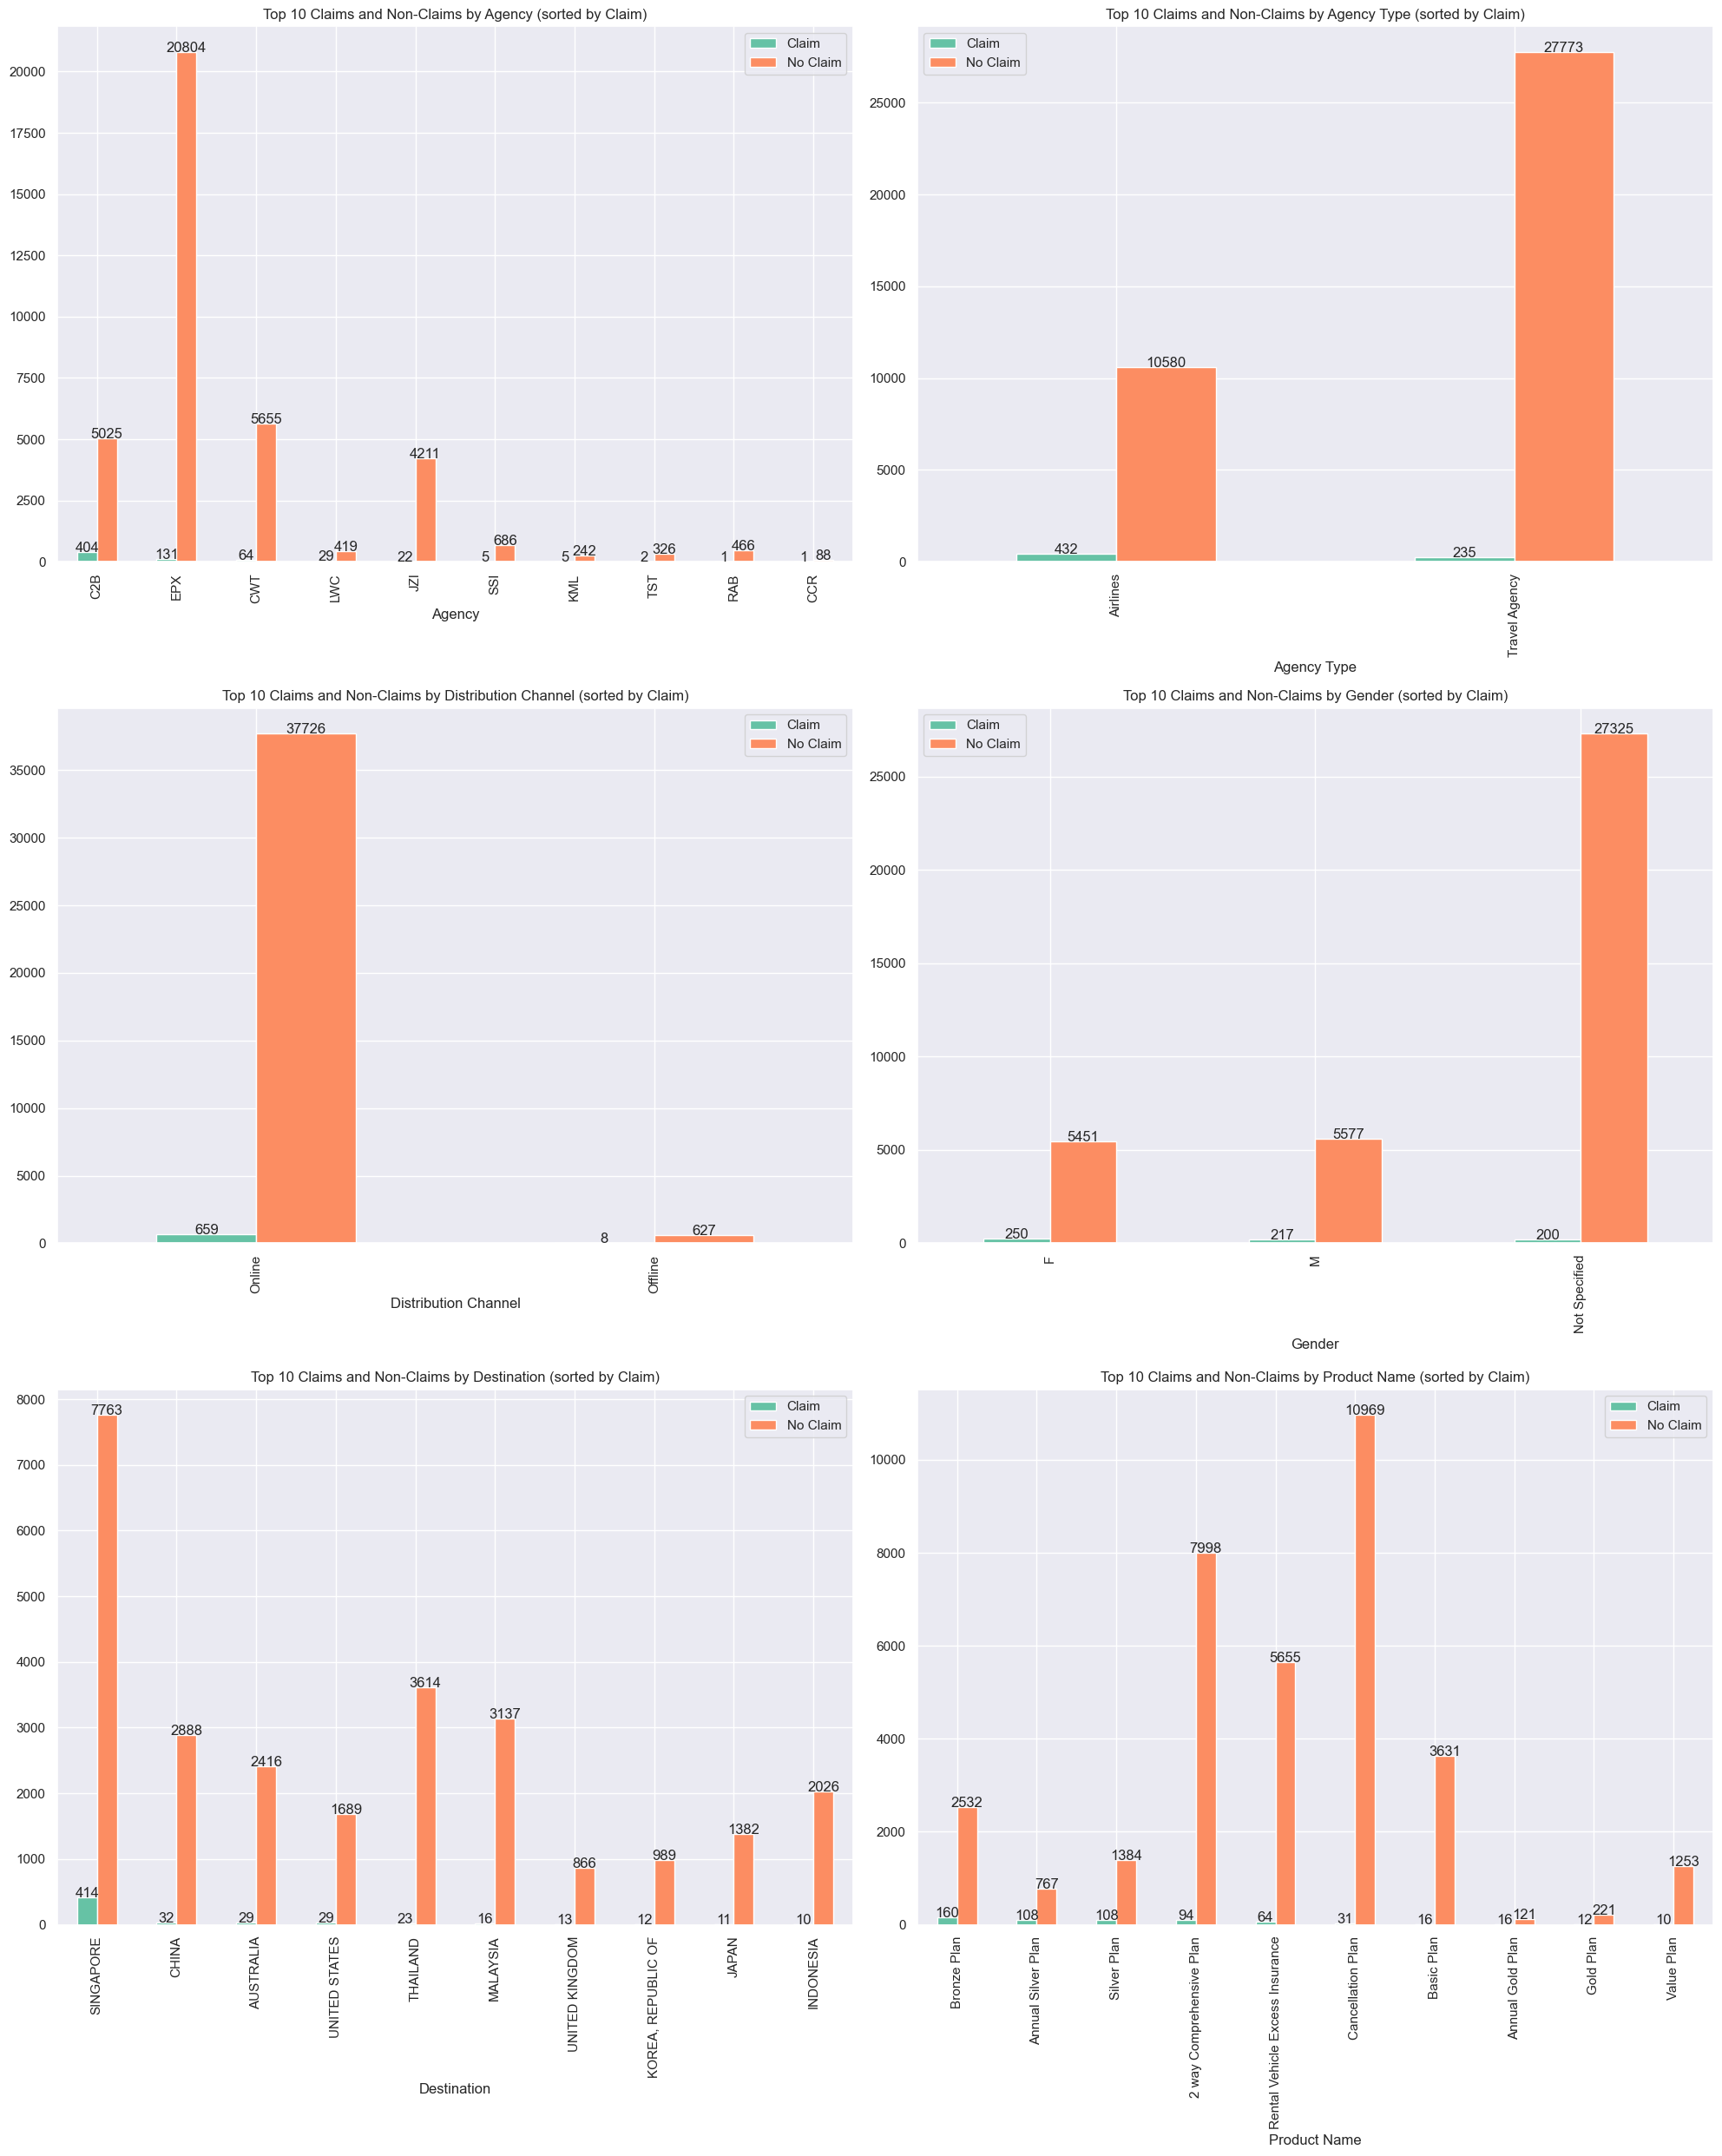

In [227]:
df_claim = df_eda[df_eda['Claim'] == 'Yes']
df_no_claim = df_eda[df_eda['Claim'] == "No"]

features = ['Agency', 'Agency Type', 'Distribution Channel', 'Gender', 'Destination', 'Product Name']

# Mengatur ukuran gambar
plt.figure(figsize=(20, 25))
sns.set(palette='Set2')

# Variabel untuk nomor plot
plotnumber = 1

# Iterasi melalui setiap fitur untuk membuat plot
for feature in features:
    ax = plt.subplot(3, 2, plotnumber)
    
    # Group by feature and claim status, then count the occurrences
    plot_data_claim = df_claim[feature].value_counts().sort_values(ascending=False).head(10).sort_values(ascending=False)
    plot_data_no_claim = df_no_claim[df_no_claim[feature].isin(plot_data_claim.index)][feature].value_counts().reindex(plot_data_claim.index).fillna(0)
    
    # Create a DataFrame with both counts
    plot_data = pd.DataFrame({'Claim': plot_data_claim, 'No Claim': plot_data_no_claim})
    
    # Create a grouped bar plot
    plot_data.plot(kind='bar', ax=ax)
    
    plt.xlabel(feature)
    plt.title(f'Top 10 Claims and Non-Claims by {feature} (sorted by Claim)')
    
    # Menambahkan teks pada setiap bar
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, 
                p.get_height() + 0.05, 
                int(p.get_height()), 
                ha='center')
    plt.xticks(rotation=90)

    plotnumber += 1
    plt.tight_layout()

plt.show()


**Agency**

- Claims: Agency C2B has the highest number of claims.
- Non-claims: The majority of non-claims also come from C2B.
- Agencies such as EPX and CWT have significant non-claims but very few claims.

**Agency Type**

- Claims: Travel Agency type dominates both claims and non-claims, with non-claims being significantly higher.
- Airlines type has fewer claims and non-claims compared to Travel Agency.

**Distribution Channel**

- Claims: Offline distribution channel has a large number of non-claims, significantly higher than claims.
- Online distribution channel has a few claims and non-claims, indicating lower engagement overall.

**Gender**

- Both genders, M and F, have similar claim counts.
- Non-claims are much higher for both genders, with M having slightly more non-claims than F.
- A significant number of records have gender Not Specified, with a considerable number of non-claims.

**Destination**

- Claims: Singapore is the most common destination with the highest number of claims and non-claims.
- Other destinations like China, Australia, and United States also have high non-claims but relatively fewer claims.
- Some destinations like Korea, Republic of and Japan have a balanced proportion of claims to non-claims.

**Product Name**

- Claims: 2 Way Comprehensive Plan has the highest number of claims and non-claims.
- Annual Silver Plan and Bronze Plan have relatively fewer claims.
- Silver Plan and Annual Gold Plan have a high number of non-claims compared to claims.

**Summary**

- Majority of the data consists of non-claims across all features, indicating an imbalance in the dataset.
- Agency C2B and Travel Agency type are the most engaged with the highest counts of both claims and non-claims.
- Most claims and non-claims come from Offline distribution channels.
- 2 Way Comprehensive Plan product has the highest engagement in terms of both claims and non-claims.
- Singapore is the top destination for claims and non-claims, followed by a few other major travel destinations.

This analysis highlights areas where insurance companies can focus their attention, such as the most frequent agencies, distribution channels, destinations, and product names. It also shows the imbalance in the dataset, which is crucial for model training and evaluation.


#### Numerical

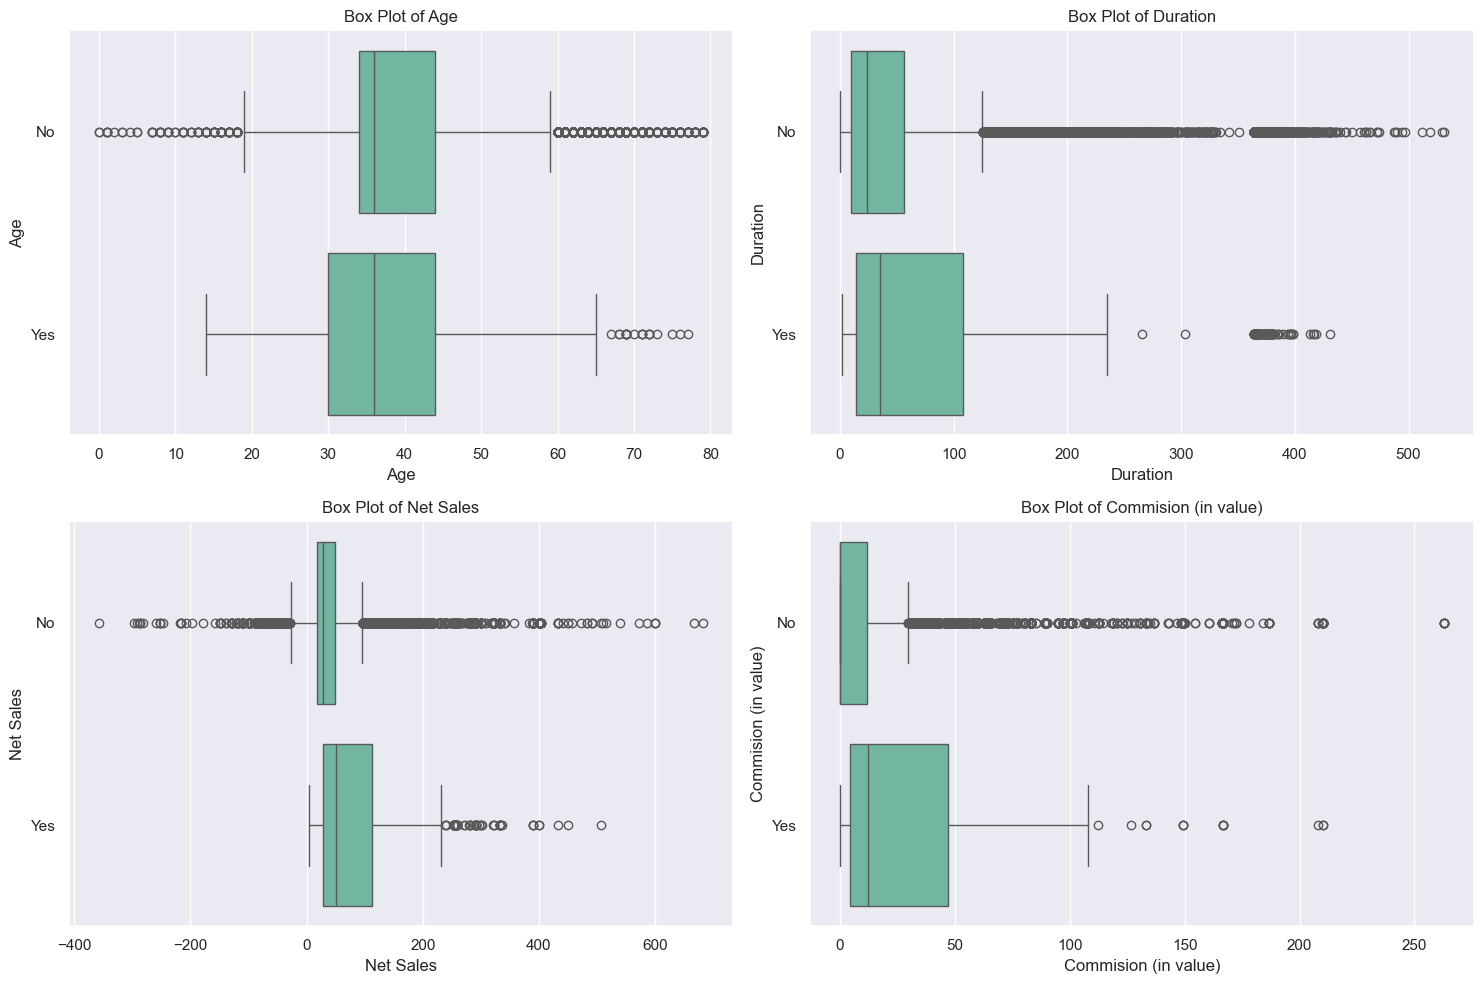

In [228]:
numerical_features = ['Age','Duration','Net Sales', 'Commision (in value)']

# Mengatur ukuran gambar
plt.figure(figsize=(15, 10))
sns.set(palette='Set2')

# Variabel untuk nomor plot
plotnumber = 1

# Iterasi melalui setiap fitur numerik untuk membuat plot
for feature in numerical_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.boxplot(x=feature, y='Claim', data=df_eda, orient='h')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature}')
    plotnumber += 1
    plt.tight_layout()

plt.show()



In [229]:
df_eda.groupby('Claim')[['Age','Duration', 'Net Sales', 'Commision (in value)']].mean()

,Age,Duration,Net Sales,Commision (in value)
Claim,,,,
No,38.902876,49.875108,41.197713,10.008302
Yes,37.673163,107.283358,93.588321,25.910645


Age
* people who claim and not claim travel insurance have about the same age average (38.5 years old - 39.9 years old)

Duration
* people who claim have more duration insurance (105.7) than the people not claim (48.5)

Net Sales
* people who claim travel insurance have more net sales for company (93.5) than people who not claim (39.7)

Net Sales
* people who claim travel insurance have more commision for agent (25.9) than people who not claim (9.4)



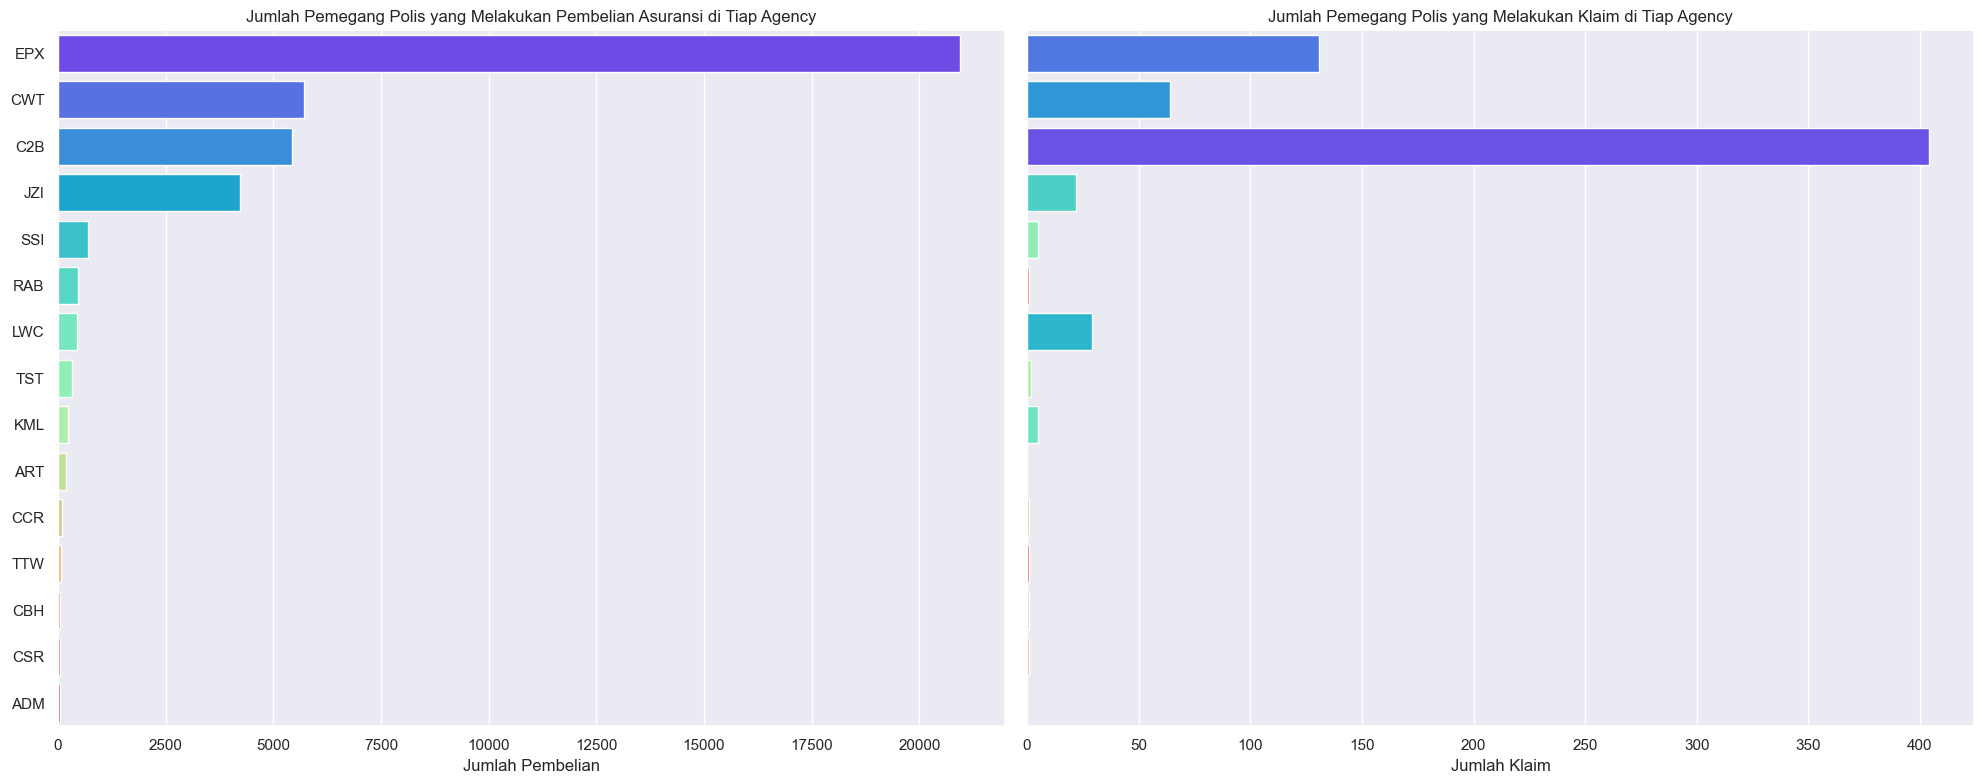

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah pemegang polis yang melakukan klaim di tiap agensi
df1 = df_eda[df_eda['Claim'] == "Yes"][['Agency', 'Claim']]
claims_count = df1.groupby('Agency').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Menghitung jumlah pemegang polis yang melakukan pembelian asuransi di tiap agensi
total_policies_count = df_eda.groupby('Agency').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Membuat grid layout untuk dua grafik
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Plot jumlah pembelian asuransi di tiap agensi
sns.barplot(ax=axes[0], x='Count', y='Agency', data=total_policies_count, palette='rainbow')
axes[0].set_title('Jumlah Pemegang Polis yang Melakukan Pembelian Asuransi di Tiap Agency')
axes[0].set_xlabel('Jumlah Pembelian')
axes[0].set_ylabel('')

# Plot jumlah klaim di tiap agensi
sns.barplot(ax=axes[1], x='Count', y='Agency', data=claims_count, palette='rainbow')
axes[1].set_title('Jumlah Pemegang Polis yang Melakukan Klaim di Tiap Agency')
axes[1].set_xlabel('Jumlah Klaim')
axes[1].set_ylabel('Agency')



# Menampilkan grafik
plt.tight_layout()
plt.show()


The highest number of claims is observed through agencies like C2B, followed by EPX, CWT, and LWC. There must be reasons why marketing products through these agencies result in higher claim rates, especially for C2B, which only has 403 out of 5333 policyholders (7.5%) making claims. Therefore, I recommend focusing product marketing efforts on agencies that not only have high sales volumes but also low claim submission percentages, such as EPX (0.62%).

This strategic approach aims to optimize marketing efforts by targeting agencies with significant product sales and lower claim rates, potentially reducing overall claim expenses while maximizing sales.

**Durasi perjalanan dengan claim terbanyak**

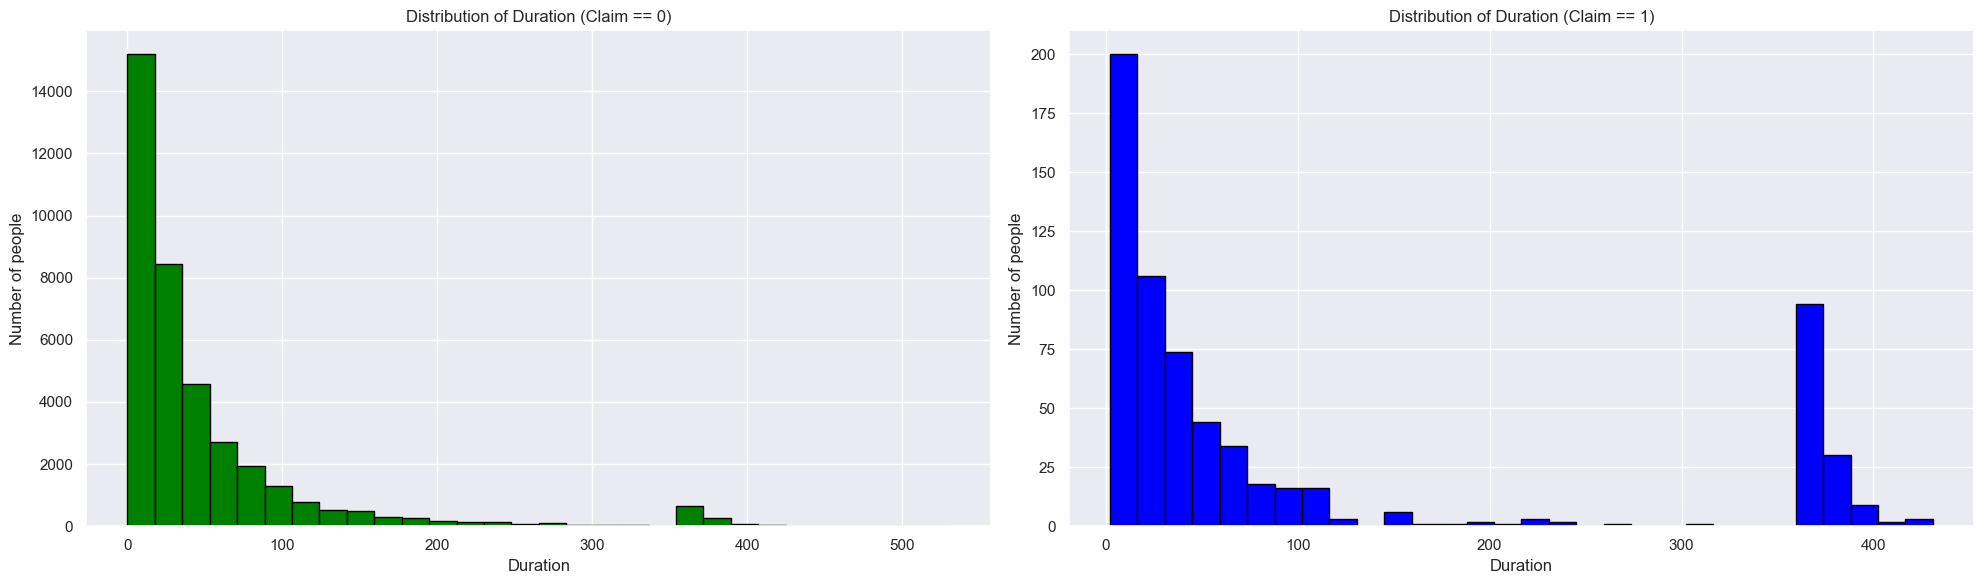

In [231]:
import matplotlib.pyplot as plt

# Membuat grid layout untuk dua grafik
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot untuk Claim == 0 (Tidak ada klaim)
axes[0].hist(df_eda[df_eda['Claim'] == 'No']['Duration'], bins=30, color='green', edgecolor='black')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Number of people')
axes[0].set_title('Distribution of Duration (Claim == 0)')

# Plot untuk Claim == 1 (Ada klaim)
axes[1].hist(df_eda[df_eda['Claim'] == 'Yes']['Duration'], bins=30, color='blue', edgecolor='black')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Number of people')
axes[1].set_title('Distribution of Duration (Claim == 1)')

# Menampilkan grafik
plt.tight_layout()
plt.show()


Claims are frequently requested for travel durations of approximately 0-50 days, which is also true for non-claims. This pattern is reasonable as the majority of people tend to undertake short-duration trips.

This insight highlights the correlation between travel duration and claim requests, indicating that travel insurance claims are more common during shorter trips.

**Mayoritas usia pemegang polis yang mengajukan claim**

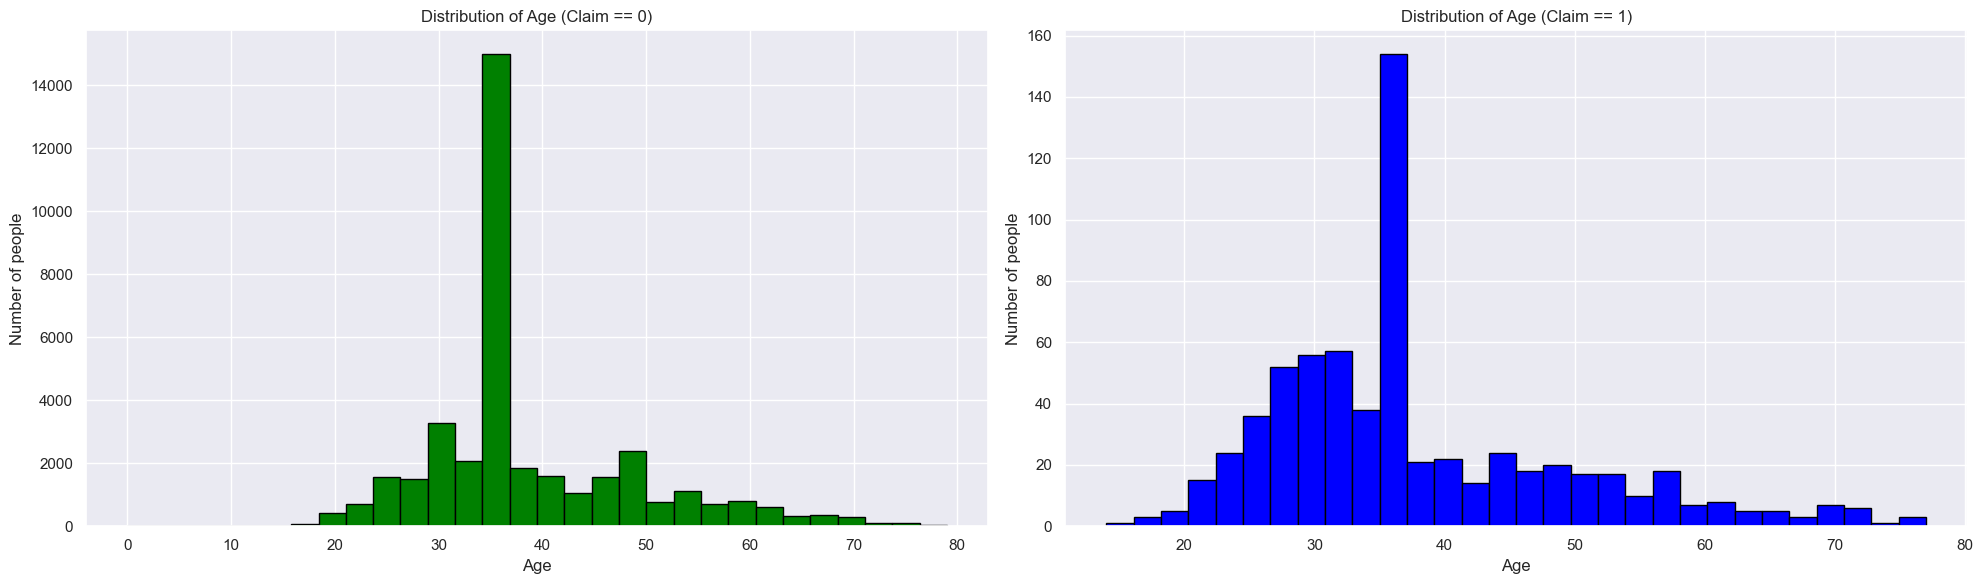

In [232]:
import matplotlib.pyplot as plt

# Membuat grid layout untuk dua grafik
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot untuk Claim == 0 (Tidak ada klaim)
axes[0].hist(df_eda[df_eda['Claim'] == 'No']['Age'], bins=30, color='green', edgecolor='black')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of people')
axes[0].set_title('Distribution of Age (Claim == 0)')

# Plot untuk Claim == 1 (Ada klaim)
axes[1].hist(df_eda[df_eda['Claim'] == 'Yes']['Age'], bins=30, color='blue', edgecolor='black')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number of people')
axes[1].set_title('Distribution of Age (Claim == 1)')

# Menampilkan grafik
plt.tight_layout()
plt.show()


**Distribution of policyholder ages**

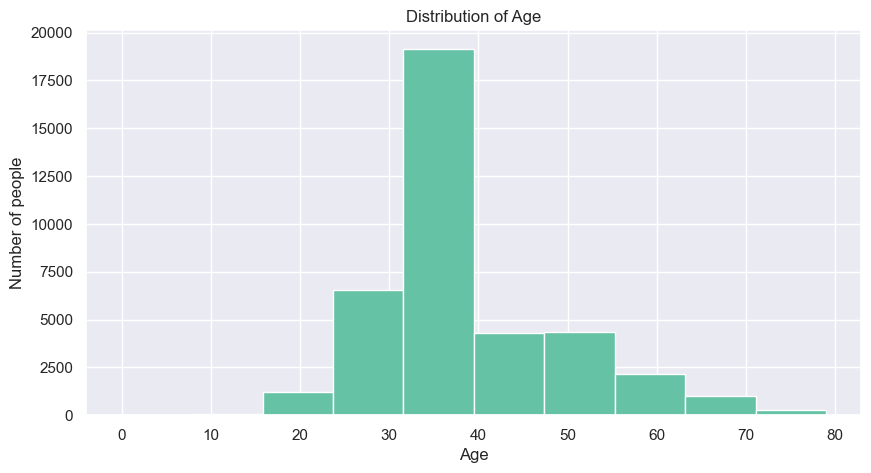

In [233]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df_eda['Age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of Age')
plt.show()

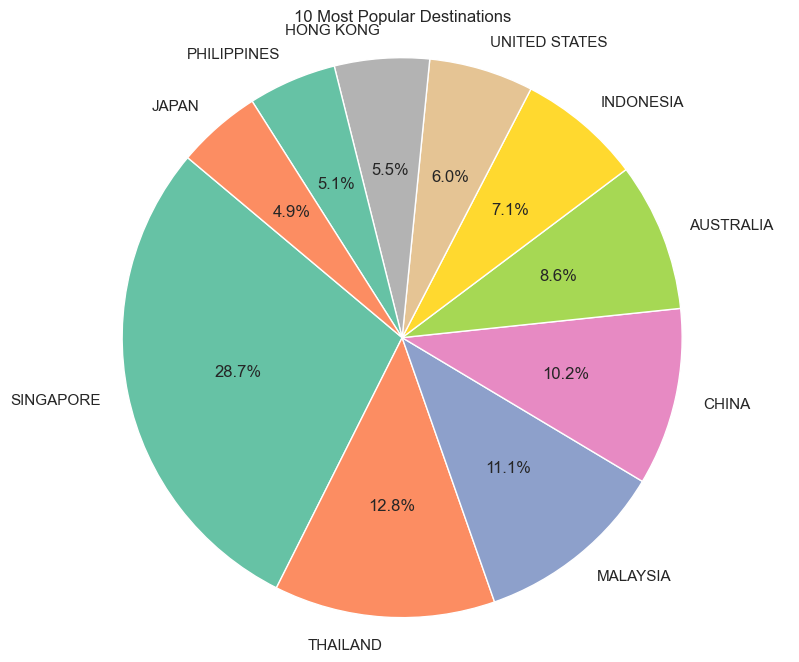

In [234]:

# Example dataframe (replace with your actual dataframe)
dataframe = df_eda.groupby(by=['Destination']).size().reset_index(name='counts')

# Selecting top 10 destinations based on counts
top_destinations = dataframe.nlargest(10, 'counts')

# Grouping other destinations as 'Others' if counts <= 1090
dataframe['DestinationNew'] = np.where(dataframe['counts'] > 1090, dataframe['Destination'], 'Others')

# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_destinations['counts'], labels=top_destinations['Destination'], autopct='%1.1f%%', startangle=140)
plt.title('10 Most Popular Destinations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


The most popular destination is Singapore, which is expected since this dataset is based on agencies located in Singapore, suggesting that most insurance buyers are likely from Singapore. The next most visited destinations are Thailand, Malaysia, China, Australia, and Indonesia, each with a percentage above 5%. This indicates a significant number of travelers not only within the country but also flying abroad.

Therefore, insurance companies should continue to market travel insurance products through both airlines and travel agencies, recognizing the diverse travel patterns observed across these destinations.

**The product that receives the most claims**

In [235]:
import pandas as pd

# Filter data for claimed policies
claimeddata = df_eda[df_eda['Claim'] == 'Yes']

# Calculate total counts of each product name
tot = pd.DataFrame(df_eda['Product Name'].value_counts()).reset_index()
tot.columns = ['Product Name', 'Total']

# Calculate claimed counts of each product name
tot_claim = pd.DataFrame(claimeddata['Product Name'].value_counts()).reset_index()
tot_claim.columns = ['Product Name', 'Claimed']

# Merge total and claimed counts, filling NaNs with 0
combined = pd.merge(tot, tot_claim, on='Product Name', how='outer').fillna(0)

# Sort by total counts in descending order
combined_sorted = combined.sort_values(by='Claimed', ascending=False)

combined_sorted

,Product Name,Total,Claimed
9,Bronze Plan,2692,160.0
17,Silver Plan,1492,108.0
4,Annual Silver Plan,875,108.0
1,2 way Comprehensive Plan,8092,94.0
16,Rental Vehicle Excess Insurance,5719,64.0
10,Cancellation Plan,11000,31.0
3,Annual Gold Plan,137,16.0
8,Basic Plan,3647,16.0
13,Gold Plan,233,12.0
25,Value Plan,1263,10.0


In [236]:
combined['Ratio'] = (combined['Claimed'] / combined['Total']) * 100
# Sort by ratio in descending order
combined_sorted = combined.sort_values(by='Ratio', ascending=False)
combined_sorted

,Product Name,Total,Claimed,Ratio
4,Annual Silver Plan,875,108.0,12.342857
3,Annual Gold Plan,137,16.0,11.678832
5,Annual Travel Protect Gold,63,7.0,11.111111
19,Single Trip Travel Protect Platinum,46,5.0,10.869565
21,Spouse or Parents Comprehensive Plan,13,1.0,7.692308
17,Silver Plan,1492,108.0,7.238606
7,Annual Travel Protect Silver,59,4.0,6.779661
9,Bronze Plan,2692,160.0,5.943536
6,Annual Travel Protect Platinum,34,2.0,5.882353
18,Single Trip Travel Protect Gold,132,7.0,5.303030


The 5 products with the highest claim ratio are Annual Silver Plan, Annual Gold Plan, Annual Travel Protect Gold, Single Trip Travel Protect Platinum, and Spouse or Parents Comprehensive Plan. These products largely consist of long-term travel insurance plans. This pattern is understandable as longer coverage durations increase the likelihood of claims occurring.

This observation underscores the correlation between insurance product duration and claim ratios, highlighting the higher propensity for claims in longer-term travel insurance policies.

### View Comparison of Target Data

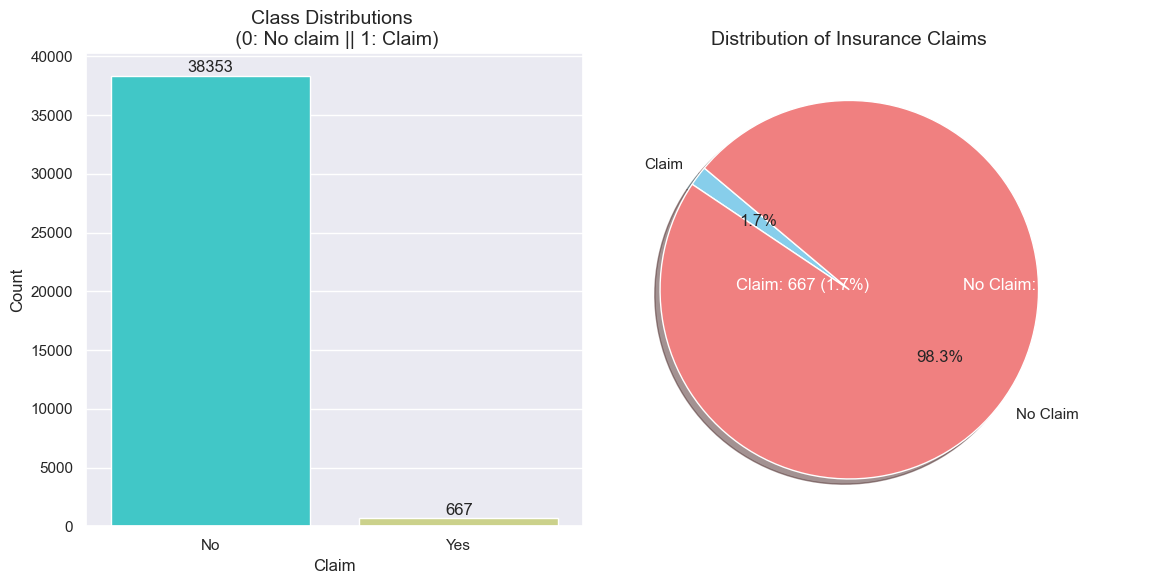

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah pemegang polis yang melakukan claim ('Yes') dan tidak melakukan claim ('No')
yes = df_eda[df_eda['Claim'] == 'Yes'].shape[0]
no = df_eda[df_eda['Claim'] == 'No'].shape[0]

# Cek persentase claim yes dan no
percent_yes = (yes / (yes + no)) * 100
percent_no = (no / (yes + no)) * 100

# Plotting dengan subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
sns.countplot(x='Claim', data=df_eda, palette='rainbow', ax=ax1)
ax1.set_title('Class Distributions \n (0: No claim || 1: Claim)', fontsize=14)
ax1.set_ylabel('Count')

# Text di atas bar chart
ax1.text(1, yes + 50, f'{yes}', ha='center', va='bottom', fontsize=12)
ax1.text(0, no + 50, f'{no}', ha='center', va='bottom', fontsize=12)

# Pie chart
sizes = [yes, no]
labels = ['Claim', 'No Claim']
colors = ['skyblue', 'lightcoral']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('Distribution of Insurance Claims', fontsize=14)

# Text di tengah pie chart
total = yes + no
ax2.text(-0.6, 0, f'Claim: {yes} ({percent_yes:.1f}%)', fontsize=12, color='white')
ax2.text(0.6, 0, f'No Claim: {no} ({percent_no:.1f}%)', fontsize=12, color='white')

plt.tight_layout()
plt.show()


## **Feature Engineering**
Here are some feature engineering steps that will be performed:

**1) Encoding**

After checking the dataset summary, it appears that the data types in all columns are correct. However, to simplify the process of analysis and modeling, categorical data will be processed with encoding first, while numerical data will not receive any treatment.

Here are the encoding methods to be applied:
- The variables Agency Type and Distribution Channel have only 2 unique data, so preprocessing will use One Hot Encoding. We will use the Drop first feature to avoid overfitting, especially in the Logistic Regression model.
- The variables Agency, Product Name, and Destination are nominal variables with many unique data, so they will be processed using Binary encoding.
- No treatment will be applied to Duration, Net Sales, Commission (in value), and Age.

**2) Scaling**

Scaling will only be applied to the Logistic Regression and KNN models, while Decision Tree, Random Forest, XGBoost, and LightGBM models will be processed without scaling the data. This is because scaling is only suitable for models that require normality assumptions and use distance functions. Scaling is not suitable for Tree-based models as it can complicate the interpretation process. Based on the experience of Rodrigue Tchamna, a Data Scientist at Eos Energy Enterprises, Inc., using scaling on XGBoost models resulted in worse predictions compared to models without scaling.

Sources:
- [When to Standardize Data](https://sebastianraschka.com/faq/docs/when-to-standardize.html)
- [Which Models Require Normalized Data](https://towardsdatascience.com/which-models-require-normalized-data-d85ca3c85388)
- [Effect of Feature Scaling on XGBoost](https://www.linkedin.com/pulse/effect-feature-scaling-xgboost-rodrigue-tchamna-phd/)

The scaling method to be used is Robust Scaler because it transforms data using Q1 and Q3, ensuring that scaling is not affected by outlier data with large ranges, making it suitable for non-normally distributed data.


### Add Random State

In [238]:
random_seed = 0
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

### Add New Features

#### Continent

In [239]:
continent_map = {
    'SINGAPORE': 'Asia',
    'MALAYSIA': 'Asia',
    'INDIA': 'Asia',
    'UNITED STATES': 'North America',
    'KOREA, REPUBLIC OF': 'Asia',
    'THAILAND': 'Asia',
    'GERMANY': 'Europe',
    'JAPAN': 'Asia',
    'INDONESIA': 'Asia',
    'VIET NAM': 'Asia',
    'AUSTRALIA': 'Oceania',
    'FINLAND': 'Europe',
    'UNITED KINGDOM': 'Europe',
    'SRI LANKA': 'Asia',
    'SPAIN': 'Europe',
    'HONG KONG': 'Asia',
    'MACAO': 'Asia',
    'CHINA': 'Asia',
    'UNITED ARAB EMIRATES': 'Asia',
    'IRAN, ISLAMIC REPUBLIC OF': 'Asia',
    'TAIWAN, PROVINCE OF CHINA': 'Asia',
    'POLAND': 'Europe',
    'CANADA': 'North America',
    'OMAN': 'Asia',
    'PHILIPPINES': 'Asia',
    'GREECE': 'Europe',
    'BELGIUM': 'Europe',
    'TURKEY': 'Asia',
    'BRUNEI DARUSSALAM': 'Asia',
    'DENMARK': 'Europe',
    'SWITZERLAND': 'Europe',
    'NETHERLANDS': 'Europe',
    'SWEDEN': 'Europe',
    'MYANMAR': 'Asia',
    'KENYA': 'Africa',
    'CZECH REPUBLIC': 'Europe',
    'FRANCE': 'Europe',
    'RUSSIAN FEDERATION': 'Europe',
    'PAKISTAN': 'Asia',
    'ARGENTINA': 'South America',
    'TANZANIA, UNITED REPUBLIC OF': 'Africa',
    'SERBIA': 'Europe',
    'ITALY': 'Europe',
    'CROATIA': 'Europe',
    'NEW ZEALAND': 'Oceania',
    'PERU': 'South America',
    'MONGOLIA': 'Asia',
    'CAMBODIA': 'Asia',
    'QATAR': 'Asia',
    'NORWAY': 'Europe',
    'LUXEMBOURG': 'Europe',
    'MALTA': 'Europe',
    "LAO PEOPLE'S DEMOCRATIC REPUBLIC": 'Asia',
    'ISRAEL': 'Asia',
    'SAUDI ARABIA': 'Asia',
    'AUSTRIA': 'Europe',
    'PORTUGAL': 'Europe',
    'NEPAL': 'Asia',
    'UKRAINE': 'Europe',
    'ESTONIA': 'Europe',
    'ICELAND': 'Europe',
    'BRAZIL': 'South America',
    'MEXICO': 'North America',
    'CAYMAN ISLANDS': 'North America',
    'PANAMA': 'North America',
    'BANGLADESH': 'Asia',
    'TURKMENISTAN': 'Asia',
    'BAHRAIN': 'Asia',
    'KAZAKHSTAN': 'Asia',
    'TUNISIA': 'Africa',
    'IRELAND': 'Europe',
    'ETHIOPIA': 'Africa',
    'NORTHERN MARIANA ISLANDS': 'Oceania',
    'MALDIVES': 'Asia',
    'SOUTH AFRICA': 'Africa',
    'VENEZUELA': 'South America',
    'COSTA RICA': 'North America',
    'JORDAN': 'Asia',
    'MALI': 'Africa',
    'CYPRUS': 'Europe',
    'MAURITIUS': 'Africa',
    'LEBANON': 'Asia',
    'KUWAIT': 'Asia',
    'AZERBAIJAN': 'Asia',
    'HUNGARY': 'Europe',
    'BHUTAN': 'Asia',
    'BELARUS': 'Europe',
    'MOROCCO': 'Africa',
    'ECUADOR': 'South America',
    'UZBEKISTAN': 'Asia',
    'CHILE': 'South America',
    'FIJI': 'Oceania',
    'PAPUA NEW GUINEA': 'Oceania',
    'ANGOLA': 'Africa',
    'FRENCH POLYNESIA': 'Oceania',
    'NIGERIA': 'Africa',
    'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF': 'Europe',
    'NAMIBIA': 'Africa',
    'GEORGIA': 'Asia',
    'COLOMBIA': 'South America',
    'SLOVENIA': 'Europe',
    'EGYPT': 'Africa',
    'ZIMBABWE': 'Africa',
    'BULGARIA': 'Europe',
    'BERMUDA': 'North America',
    'URUGUAY': 'South America',
    'GUINEA': 'Africa',
    'GHANA': 'Africa',
    'BOLIVIA': 'South America',
    'TRINIDAD AND TOBAGO': 'North America',
    'VANUATU': 'Oceania',
    'GUAM': 'Oceania',
    'UGANDA': 'Africa',
    'JAMAICA': 'North America',
    'LATVIA': 'Europe',
    'ROMANIA': 'Europe',
    'REPUBLIC OF MONTENEGRO': 'Europe',
    'KYRGYZSTAN': 'Asia',
    'GUADELOUPE': 'North America',
    'ZAMBIA': 'Africa',
    'RWANDA': 'Africa',
    'BOTSWANA': 'Africa',
    'GUYANA': 'South America',
    'LITHUANIA': 'Europe',
    'GUINEA-BISSAU': 'Africa',
    'SENEGAL': 'Africa',
    'CAMEROON': 'Africa',
    'SAMOA': 'Oceania',
    'PUERTO RICO': 'North America',
    'TAJIKISTAN': 'Asia',
    'ARMENIA': 'Asia',
    'FAROE ISLANDS': 'Europe',
    'DOMINICAN REPUBLIC': 'North America',
    'MOLDOVA, REPUBLIC OF': 'Europe',
    'BENIN': 'Africa',
    'REUNION': 'Africa',
    "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF": 'Asia',
    'TIBET': 'Asia'
}

df_eda['Continent'] = df_eda['Destination'].map(continent_map)
df_eda.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Continent
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No,Asia
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4,MALAYSIA,10.0,0.0,33,No,Asia
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No,Asia
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20,UNITED STATES,112.0,0.0,59,No,North America
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No,Asia


#### Add Feature Product Name Category

In [240]:
import pandas as pd

# Assuming you have already created the mapping and `df` DataFrame

# Example mapping dictionary (replace with your actual mapping)
mapping = {
    'Annual Silver Plan': 'Annual Plans',
    'Cancellation Plan': 'Specialized Plans',
    'Basic Plan': 'Basic Plans',
    '2 way Comprehensive Plan': 'Comprehensive Plans',
    'Bronze Plan': 'Other',
    '1 way Comprehensive Plan': 'Comprehensive Plans',
    'Rental Vehicle Excess Insurance': 'Specialized Plans',
    'Single Trip Travel Protect Gold': 'Other Plans',
    'Silver Plan': 'Other Plans',
    'Value Plan': 'Basic Plans',
    '24 Protect': 'Other Plans',
    'Annual Travel Protect Gold': 'Annual Plans',
    'Comprehensive Plan': 'Other',
    'Ticket Protector': 'Specialized Plans',
    'Travel Cruise Protect': 'Specialized Plans',
    'Single Trip Travel Protect Silver': 'Other Plans',
    'Individual Comprehensive Plan': 'Comprehensive Plans',
    'Gold Plan': 'Other Plans',
    'Annual Gold Plan': 'Annual Plans',
    'Child Comprehensive Plan': 'Comprehensive Plans',
    'Premier Plan': 'Basic Plans',
    'Annual Travel Protect Silver': 'Annual Plans',
    'Single Trip Travel Protect Platinum': 'Other Plans',
    'Annual Travel Protect Platinum': 'Annual Plans',
    'Spouse or Parents Comprehensive Plan': 'Other Plans',
    'Travel Cruise Protect Family': 'Specialized Plans'
}

# Apply mapping to create the 'Category' column
df_eda['Product Name Category'] = df_eda['Product Name'].map(mapping)
# Display the updated DataFrame
df_eda.head(5)


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Continent,Product Name Category
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No,Asia,Annual Plans
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4,MALAYSIA,10.0,0.0,33,No,Asia,Specialized Plans
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No,Asia,Basic Plans
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20,UNITED STATES,112.0,0.0,59,No,North America,Comprehensive Plans
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No,Asia,Other


### Scaler

In [241]:
robust = RobustScaler()

### Transformer

In [242]:
# Define your main column transformer
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel','Gender']),
    ('binary', BinaryEncoder(), ['Agency', 'Product Name', 'Destination', 'Continent','Product Name Category'])
], remainder='passthrough')


### Data Splitting

In [243]:
df_eda['Claim'] = df_eda['Claim'].replace({'No': 0, 'Yes': 1})
X = df_eda.drop(columns=['Claim'])
y = df_eda['Claim']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state= random_seed
)

### Dummpy Encoded Dataframe

In [244]:
encoded = column_transformer.fit_transform(df_eda.drop(columns=['Claim']))

# Get the feature names from the transformers
binary_encoder_features = list(column_transformer.transformers_[1][1].get_feature_names_out(['Agency', 'Product Name', 'Destination', 'Continent', 'Product Name Category']))
onehot_encoder_features = list(column_transformer.transformers_[0][1].get_feature_names_out(['Agency Type', 'Distribution Channel', 'Gender']))
numeric_features = ['Net Sales', 'Duration', 'Commision (in value)', 'Age']

# Concatenate all feature names
features_names =binary_encoder_features + onehot_encoder_features + numeric_features

# Create a DataFrame with the encoded data and assigned feature names
encoded_df = pd.DataFrame(encoded, columns=features_names)

# Add back the 'Claim' column to the encoded DataFrame
encoded_df['Claim'] = df_eda['Claim'].values

# Separate features and target
X_encoded = encoded_df.drop(columns=['Claim'])
y_encoded = encoded_df['Claim']

# Split the encoded data into train and test sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    X_encoded,
    y_encoded,
    stratify=y_encoded,
    test_size=0.2,
    random_state= random_seed
)
X_train_encoded

,Agency_0,Agency_1,Agency_2,Agency_3,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,...,Product Name Category_1,Product Name Category_2,Agency Type_Travel Agency,Distribution Channel_Online,Gender_M,Gender_Not Specified,Net Sales,Duration,Commision (in value),Age
8689,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,7.0,14.0,0.0,36.0
23906,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,6.0,15.0,6.0,44.0
28795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,80.0,18.0,4.5,25.0
619,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,6.0,34.0,0.0,36.0
12494,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,41.0,112.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30569,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,25.0,28.0,0.0,36.0
16703,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,11.0,41.0,0.0,30.0
37579,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,10.0,58.0,20.3,46.0
25703,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,3.0,18.0,6.3,47.0


In [245]:
l

NameError: name 'l' is not defined

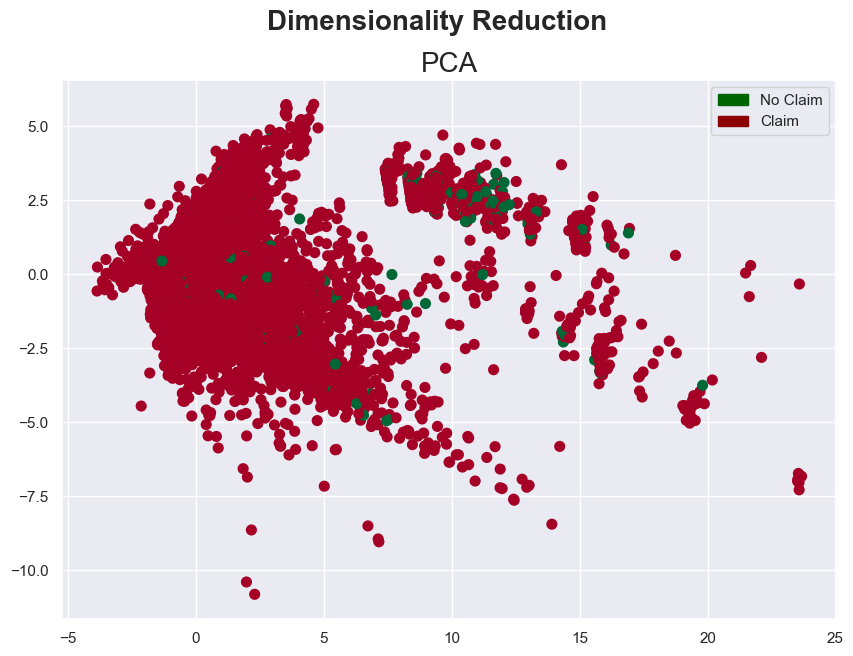

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming X and y are already defined, if not, define them appropriately
# X = ... (your feature matrix)
# y = ... (your target variable)

# Define your main column transformer
column_transformer = ColumnTransformer([
    ('scaler_pipeline', RobustScaler(), ['Net Sales', 'Duration', 'Commision (in value)', 'Age']),
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel', 'Gender', 'Product Name Category']),
    ('binary', BinaryEncoder(), ['Agency', 'Product Name', 'Destination', 'Continent'])
], remainder='passthrough')

# Implement dimensionality reductions
X_transformed = column_transformer.fit_transform(X)
X_pca = PCA(n_components=2, random_state=38).fit_transform(X_transformed)

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))
fig.suptitle('Dimensionality Reduction', fontsize=20, fontweight='bold')

# Define color patches for legend
green_patch = mpatches.Patch(color='darkgreen', label='No Claim')
red_patch = mpatches.Patch(color='darkred', label='Claim')

# Scatter plot
ax.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='RdYlGn', linewidths=2)
ax.set_title('PCA', fontsize=20)
ax.grid(True)
ax.legend(handles=[green_patch, red_patch])

plt.show()


Here we can see that the use of dimensionality reduction has not been able to effectively map our data between claims and non-claims due to extreme imbalance.

### Model

In [ ]:
# Using Scaler
knn = KNeighborsClassifier()
svm = SVC(random_state= random_seed)
logreg = LogisticRegression(random_state=random_seed)

# No Need Scaler
gbc = GradientBoostingClassifier(random_state=random_seed)
xgbc = XGBClassifier(random_state = random_seed, verbosity=0)
tree = DecisionTreeClassifier(random_state=random_seed)
rf = RandomForestClassifier(random_state=random_seed)
ada = AdaBoostClassifier(tree, random_state=random_seed)

models = [logreg, knn, svm, tree, rf, ada, gbc, xgbc]
models_need_scaling = [logreg, knn, svm]
models_no_scaling = [tree, rf, ada, gbc, xgbc]

In [249]:
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = total_samples / class_counts[1]
print(f"Calculated Class Weights: {class_weights}")

# Using Scaler
logreg_weight = LogisticRegression(random_state=random_seed, class_weight='balanced')
knn_weight = KNeighborsClassifier()
svm_weight = SVC(random_state=random_seed, class_weight='balanced')

# No Need Scaler
tree_weight = DecisionTreeClassifier(random_state=random_seed, class_weight='balanced')
rf_weight = RandomForestClassifier(random_state=random_seed, class_weight='balanced')
ada_weight = AdaBoostClassifier(tree_weight, random_state=random_seed)
gbc_weight = GradientBoostingClassifier(random_state=random_seed)
xgbc_weight = XGBClassifier(random_state=random_seed, scale_pos_weight=class_weights,silent=True)



weighted_models = [logreg_weight, knn_weight, svm_weight, tree_weight, rf_weight, ada_weight, gbc_weight, xgbc_weight]
weighted_models_need_scaling = [logreg_weight, knn_weight, svm_weight]
weighted_models_no_scaling = [tree_weight, rf_weight, ada_weight, gbc_weight, xgbc_weight]

Calculated Class Weights: 58.45692883895131


In [ ]:
j

### Feature Selection 

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline as ImblearnPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

models = {
    'Gradientboost': GradientBoostingClassifier(random_state=random_seed),
    'RandomForest': RandomForestClassifier(random_state=random_seed)
}

# Nilai k yang akan dievaluasi
k_values = [5, 10, 15, 20, 25, 31]  # sesuaikan dengan jumlah fitur

# Untuk menyimpan hasil
results = {model_name: {} for model_name in models}
selected_features = {model_name: {} for model_name in models}

# Evaluasi cross-validation untuk berbagai nilai k dan model
for model_name, model in models.items():
    for k in k_values:
        # Pipeline dengan StandardScaler, SelectKBest, dan model
        pipeline = ImblearnPipeline([
            ('scaler', robust),
            ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
            ('model', model)
        ])
        
        # Cross-validation dengan StratifiedKFold
        skfold = StratifiedKFold(n_splits=5)
        scores = cross_val_score(pipeline, X_encoded, y_encoded, cv=skfold, scoring='recall')
        
        # Simpan hasil rata-rata recall
        results[model_name][k] = np.mean(scores)
        
        # Fit pipeline to get selected features
        pipeline.fit(X_encoded, y_encoded)
        selected_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)
        selected_feature_names = X_encoded.columns[selected_indices]
        selected_features[model_name][k] = selected_feature_names
        
        # Cetak progress
        print(f'Model: {model_name}, k={k}, Mean Recall: {results[model_name][k]:.4f}')

# Tentukan nilai k terbaik untuk setiap model berdasarkan performa
best_ks = {model_name: max(results[model_name], key=results[model_name].get) for model_name in results}
best_recalls = {model_name: results[model_name][best_ks[model_name]] for model_name in results}

# Cetak nilai k dan recall terbaik untuk setiap model
for model_name in results:
    print(f'Best k for {model_name}: {best_ks[model_name]}, Mean Recall: {best_recalls[model_name]:.4f}')
    print(f'Selected Features for {model_name} with k={best_ks[model_name]}: {selected_features[model_name][best_ks[model_name]]}')


Model: Gradientboost, k=5, Mean Recall: 0.0000
Model: Gradientboost, k=10, Mean Recall: 0.0015
Model: Gradientboost, k=15, Mean Recall: 0.0030
Model: Gradientboost, k=20, Mean Recall: 0.0030
Model: Gradientboost, k=25, Mean Recall: 0.0030
Model: Gradientboost, k=31, Mean Recall: 0.0030
Model: RandomForest, k=5, Mean Recall: 0.0000
Model: RandomForest, k=10, Mean Recall: 0.0300
Model: RandomForest, k=15, Mean Recall: 0.0195
Model: RandomForest, k=20, Mean Recall: 0.0240
Model: RandomForest, k=25, Mean Recall: 0.0105
Model: RandomForest, k=31, Mean Recall: 0.0135
Best k for Gradientboost: 15, Mean Recall: 0.0030
Selected Features for Gradientboost with k=15: Index(['Agency_0', 'Agency_2', 'Agency_3', 'Product Name_2', 'Product Name_3',
       'Destination_2', 'Destination_3', 'Continent_2',
       'Product Name Category_0', 'Distribution Channel_Online', 'Gender_M',
       'Gender_Not Specified', 'Net Sales', 'Duration',
       'Commision (in value)'],
      dtype='object')
Best k for Ra

In [ ]:
X_test_best_K = X_test_encoded[['Agency_0', 'Agency_3', 'Product Name_2', 'Product Name_3',
       'Destination_2', 'Destination_3', 'Gender_Not Specified', 'Net Sales',
       'Duration', 'Commision (in value)']]

In [ ]:
X_train_best_K = X_train_encoded[['Agency_0', 'Agency_3', 'Product Name_2', 'Product Name_3',
       'Destination_2', 'Destination_3', 'Gender_Not Specified', 'Net Sales',
       'Duration', 'Commision (in value)']]


In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

models = {
    'LogisticRegression': logreg,
    'Randomforest': rf
}

# Nilai k yang akan dievaluasi
k_values = [5, 10, 15, 20, 25]  # sesuaikan dengan jumlah fitur

# Untuk menyimpan hasil
results = {model_name: {} for model_name in models}

# Evaluasi cross-validation untuk berbagai nilai k dan model
for model_name, model in models.items():
    for k in k_values:
        # Pipeline dengan StandardScaler, SelectKBest, dan model
        pipeline = ImblearnPipeline([
            ('transform_columns', column_transformer),
            ('scaler', robust),
            ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
            ('model', model)
        ])
        
        # Cross-validation dengan StratifiedKFold
        skfold = StratifiedKFold(n_splits=5)
        scores = cross_val_score(pipeline, X, y, cv=skfold, scoring='recall')
        
        # Simpan hasil rata-rata recall
        results[model_name][k] = np.mean(scores)
        
        # Cetak progress
        print(f'Model: {model_name}, k={k}, Mean Recall: {results[model_name][k]:.4f}')

# Tentukan nilai k terbaik untuk setiap model berdasarkan performa
best_ks = {model_name: max(results[model_name], key=results[model_name].get) for model_name in results}
best_recalls = {model_name: results[model_name][best_ks[model_name]] for model_name in results}

# Cetak nilai k dan recall terbaik untuk setiap model
for model_name in results:
    print(f'Best k for {model_name}: {best_ks[model_name]}, Mean Recall: {best_recalls[model_name]:.4f}')


Model: LogisticRegression, k=5, Mean Recall: 0.0000
Model: LogisticRegression, k=10, Mean Recall: 0.0000
Model: LogisticRegression, k=15, Mean Recall: 0.0000
Model: LogisticRegression, k=20, Mean Recall: 0.0000
Model: LogisticRegression, k=25, Mean Recall: 0.0000
Model: Randomforest, k=5, Mean Recall: 0.0060
Model: Randomforest, k=10, Mean Recall: 0.0330
Model: Randomforest, k=15, Mean Recall: 0.0255
Model: Randomforest, k=20, Mean Recall: 0.0225
Model: Randomforest, k=25, Mean Recall: 0.0105
Best k for LogisticRegression: 5, Mean Recall: 0.0000
Best k for Randomforest: 10, Mean Recall: 0.0330


In [ ]:
feature_selection_best_k = SelectKBest(score_func=f_classif, k=10)


Feature selection is performed using univariate feature selection with an F-test through the SelectKBest method. The SelectKBest method evaluates the strength of each feature's relationship with the target variable, selecting the top features based on their scores. However, to determine the optimal number of features, we conducted testing with two different models: logistic regression and random forest. By comparing the performance of these models with varying numbers of top features, we were able to identify that the best number of features to select is 10. This ensures that the selected features contribute significantly to the predictive performance of the models.

## **Modeling & Evaluation** 

dengan mengacu pada goals kita perlu membuat model yang baik
disini saya menggunakan 9 model yaitu:
- knn = KNeighborsClassifier()
- svm = SVC(random_state= random_seed)
- logreg = LogisticRegression(random_state=random_seed)
- gbc = GradientBoostingClassifier(random_state=random_seed)
- xgbc = XGBClassifier(random_state = random_seed, verbosity=0)

- tree = DecisionTreeClassifier(random_state=random_seed)
- rf = RandomForestClassifier(random_state=random_seed)
- ada = AdaBoostClassifier(tree, random_state=random_seed)

From these models, I divided them into 3 sections:

1. Models without any balancing or additional weights for the minority class
2. Models with balancing or additional weights for the minority class
3. Models with resampling
The resampling techniques used for the models are:
- SMOTE
- NearMiss
- SMOTETomek


#### **Analytic Approach (Model & Metric Evaluation)**
Data analysis will be conducted to identify pattern differences between policyholders who file claims and those who do not, as well as to gain insights into claim probabilities based on the type of insurance product sold. Subsequently, we will build a model aimed at assisting the company in predicting the likelihood of a potential policyholder filing a claim. Therefore, we will develop a classification model using several classification algorithms such as Logistic Regression, Decision Tree, KNN, Random Forest, XGBoost, and LightGBM.

Here are some possible outcomes when the model defines the claim status of a policyholder:


![Metric](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*2DiXJjAmOA7LtbkpBGODkg.png)

TP (True Positive): The number of policyholders who genuinely file a claim.

TN (True Negative): The number of policyholders who genuinely do not file a claim.

Type 1 error (FP - False Positive): The number of policyholders predicted to file a claim but actually do not.

Consequence: Insurance funds from payouts become idle money (unused funds just sitting without a clear purpose). This can hinder other company activities that also require funding and cause opportunity loss for the company.
Type 2 error (FN - False Negative): The number of policyholders predicted not to file a claim but actually do.

Consequence: Lack of preparation of insurance funds, which can impede the claim process for policyholders, resulting in the company's quality and capability being questioned and negatively impacting future product sales due to loss of public trust.

In [ ]:
sampling_strategies = {
    'SMOTE': SMOTE(random_state=random_seed),
    'SMOTETomek': SMOTETomek(random_state=random_seed),
    'Nearmiss': NearMiss(),
}

1. **SMOTE (Synthetic Minority Over-sampling Technique)**:
   - SMOTE generates synthetic samples for the minority class by interpolating between existing minority class examples. This helps to balance the class distribution and mitigate the impact of class imbalance on the model's performance.

2. **SMOTETomek**:
   - SMOTETomek is a hybrid method that combines SMOTE with Tomek Links. First, SMOTE generates synthetic samples for the minority class. Then, Tomek Links removes instances that form Tomek pairs (a pair of instances from different classes that are nearest neighbors to each other), further cleaning the boundary between classes and reducing noise.

2. **NearMiss**
   - NearMiss is a family of undersampling techniques used to handle imbalanced datasets by selectively reducing the number of majority class instances. The goal is to create a balanced dataset while retaining important data points that contribute to the decision boundary

Using these sampling methods, you aim to address class imbalance in your dataset, which is crucial for improving the performance and reliability of your model.


In [ ]:
# Scorer
scorers = {
    'recall': make_scorer(recall_score),
    'f2': make_scorer(fbeta_score, beta=2)
}

### Base Train Model

In [ ]:
base_cv_model_name = []
base_cv_recall_scores = []
base_cv_std_scores = []
base_cv_f2_scores = []

for model in models_need_scaling:
    skfold = StratifiedKFold(n_splits=5)
    
    # Define pipeline with sampling strategy and scaler
    base_cv_estimator = ImblearnPipeline([
        ('transform_columns', column_transformer),
        ('feature_selection', feature_selection_best_k),
        ('scaler', robust),  # Add scaler
        ('model', model)
    ])
    
    # Perform cross-validation
    model_cv = cross_validate(
        base_cv_estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring=scorers,
        error_score='raise',
        return_train_score=False
    )

    # Calculate recall scores and their standard deviation
    recall_mean = model_cv['test_recall'].mean()
    recall_std = np.std(model_cv['test_recall'])
    
    # Calculate F2 scores
    f2_mean = model_cv['test_f2'].mean()
    
    print(f"Model: {type(model).__name__}, CV Recall Scores: {recall_mean}, CV F2 Scores: {f2_mean}, Recall Std Dev: {recall_std}")

    # Store results
    base_cv_recall_scores.append(recall_mean)
    base_cv_std_scores.append(recall_std)
    base_cv_f2_scores.append(f2_mean)
    base_cv_model_name.append(type(model).__name__)

for model in models_no_scaling:
    skfold = StratifiedKFold(n_splits=5)
    
    # Define pipeline with sampling strategy without scaler
    base_cv_estimator = ImblearnPipeline([
        ('transform_columns', column_transformer),
        ('feature_selection', feature_selection_best_k),
        ('model', model)
    ])
    
    # Perform cross-validation
    model_cv = cross_validate(
        base_cv_estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring=scorers,
        error_score='raise',
        return_train_score=False
    )

    # Calculate recall scores and their standard deviation
    recall_mean = model_cv['test_recall'].mean()
    recall_std = np.std(model_cv['test_recall'])
    
    # Calculate F2 scores
    f2_mean = model_cv['test_f2'].mean()
    
    print(f"Model: {type(model).__name__}, CV Recall Scores: {recall_mean}, CV F2 Scores: {f2_mean}, Recall Std Dev: {recall_std}")

    # Store results
    base_cv_recall_scores.append(recall_mean)
    base_cv_std_scores.append(recall_std)
    base_cv_f2_scores.append(f2_mean)
    base_cv_model_name.append(type(model).__name__)

Model: LogisticRegression, CV Recall Scores: 0.0, CV F2 Scores: 0.0, Recall Std Dev: 0.0
Model: KNeighborsClassifier, CV Recall Scores: 0.01308411214953271, CV F2 Scores: 0.016013106105116682, Recall Std Dev: 0.013987504249622211
Model: SVC, CV Recall Scores: 0.0, CV F2 Scores: 0.0, Recall Std Dev: 0.0
Model: DecisionTreeClassifier, CV Recall Scores: 0.0468171398342444, CV F2 Scores: 0.04996312309531997, Recall Std Dev: 0.011822913804052839
Model: RandomForestClassifier, CV Recall Scores: 0.02436959971786281, CV F2 Scores: 0.028187944803378474, Recall Std Dev: 0.011297824327378409
Model: AdaBoostClassifier, CV Recall Scores: 0.0449127138070887, CV F2 Scores: 0.04905433724760262, Recall Std Dev: 0.02856168773376558
Model: GradientBoostingClassifier, CV Recall Scores: 0.0, CV F2 Scores: 0.0, Recall Std Dev: 0.0
Model: XGBClassifier, CV Recall Scores: 0.0018691588785046728, CV F2 Scores: 0.0023148148148148147, Recall Std Dev: 0.003738317757009345


In [ ]:
cv_train_benchmark = pd.DataFrame({
    'model': base_cv_model_name,
    'cv_recall_score': base_cv_recall_scores,
    'cv_score_f2': base_cv_f2_scores,
    'cv_score_std': base_cv_std_scores,
    
}).sort_values(by='cv_score_f2', ascending=False)
cv_train_benchmark


,model,cv_recall_score,cv_score_f2,cv_score_std
3,DecisionTreeClassifier,0.046817,0.049963,0.011823
5,AdaBoostClassifier,0.044913,0.049054,0.028562
4,RandomForestClassifier,0.024370,0.028188,0.011298
1,KNeighborsClassifier,0.013084,0.016013,0.013988
7,XGBClassifier,0.001869,0.002315,0.003738
0,LogisticRegression,0.000000,0.000000,0.000000
2,SVC,0.000000,0.000000,0.000000
6,GradientBoostingClassifier,0.000000,0.000000,0.000000


### Weighted Train Model

In [ ]:
weighted_cv_model_name = []
weighted_cv_recall_scores = []
weighted_cv_std_scores = []
weighted_cv_f2_scores = []

# Define scorers
scorers = {
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2)
}

# For models that need scaling
for model in weighted_models_need_scaling:
    skfold = StratifiedKFold(n_splits=5)
    
    # Define pipeline with sampling strategy and scaler
    weight_cv_estimator = ImblearnPipeline([
        ('transform_columns', column_transformer),
        ('feature_selection', feature_selection_best_k),
        ('scaler', robust),  # Add scaler
        ('model', model)
    ])
    
    # Perform cross-validation
    model_cv = cross_validate(
        weight_cv_estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring=scorers,
        error_score='raise',
        return_train_score=False
    )

    # Calculate recall scores and their standard deviation
    recall_mean = model_cv['test_recall'].mean()
    recall_std = np.std(model_cv['test_recall'])
    
    # Calculate F2 scores
    f2_mean = model_cv['test_f2'].mean()
    
    print(f"Model: {type(model).__name__}, CV Recall Scores: {recall_mean}, CV F2 Scores: {f2_mean}, Recall Std Dev: {recall_std}")

    # Store results
    weighted_cv_recall_scores.append(recall_mean)
    weighted_cv_std_scores.append(recall_std)
    weighted_cv_f2_scores.append(f2_mean)
    weighted_cv_model_name.append(type(model).__name__)

# For models that do not need scaling
for model in weighted_models_no_scaling:
    skfold = StratifiedKFold(n_splits=5)
    
    # Define pipeline with sampling strategy without scaler
    weight_cv_estimator = ImblearnPipeline([
        ('transform_columns', column_transformer),
        ('feature_selection', feature_selection_best_k),
        ('model', model)
    ])
    
    # Perform cross-validation
    model_cv = cross_validate(
        weight_cv_estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring=scorers,
        error_score='raise',
        return_train_score=False
    )

    # Calculate recall scores and their standard deviation
    recall_mean = model_cv['test_recall'].mean()
    recall_std = np.std(model_cv['test_recall'])
    
    # Calculate F2 scores
    f2_mean = model_cv['test_f2'].mean()
    
    print(f"Model: {type(model).__name__}, CV Recall Scores: {recall_mean}, CV F2 Scores: {f2_mean}, Recall Std Dev: {recall_std}")

    # Store results
    weighted_cv_recall_scores.append(recall_mean)
    weighted_cv_std_scores.append(recall_std)
    weighted_cv_f2_scores.append(f2_mean)
    weighted_cv_model_name.append(type(model).__name__)


Model: LogisticRegression, CV Recall Scores: 0.17233292188326574, CV F2 Scores: 0.16138410587343874, Recall Std Dev: 0.01685437659912132
Model: KNeighborsClassifier, CV Recall Scores: 0.013137012872509258, CV F2 Scores: 0.016081724544315907, Recall Std Dev: 0.01634376471433424
Model: SVC, CV Recall Scores: 0.14041615235408217, CV F2 Scores: 0.1352589634144537, Recall Std Dev: 0.02560183671916454
Model: DecisionTreeClassifier, CV Recall Scores: 0.21348968435901958, CV F2 Scores: 0.1546529128860154, Recall Std Dev: 0.026076091850599833
Model: RandomForestClassifier, CV Recall Scores: 0.18354787515429377, CV F2 Scores: 0.14245165342625407, Recall Std Dev: 0.017626731170847832
Model: AdaBoostClassifier, CV Recall Scores: 0.21348968435901958, CV F2 Scores: 0.1550165740600964, Recall Std Dev: 0.026076091850599833
Model: GradientBoostingClassifier, CV Recall Scores: 0.0, CV F2 Scores: 0.0, Recall Std Dev: 0.0
Model: XGBClassifier, CV Recall Scores: 0.3858578733909363, CV F2 Scores: 0.19273587

In [ ]:
weighted_cv_train_benchmark = pd.DataFrame({
    'model': weighted_cv_model_name,
    'cv_recall_score': weighted_cv_recall_scores,
    'cv_score_f2': weighted_cv_f2_scores,
    'cv_score_std': weighted_cv_std_scores,
    
}).sort_values(by='cv_score_f2', ascending=False)
weighted_cv_train_benchmark


,model,cv_recall_score,cv_score_f2,cv_score_std
7,XGBClassifier,0.385858,0.192736,0.051038
0,LogisticRegression,0.172333,0.161384,0.016854
5,AdaBoostClassifier,0.213490,0.155017,0.026076
3,DecisionTreeClassifier,0.213490,0.154653,0.026076
4,RandomForestClassifier,0.183548,0.142452,0.017627
2,SVC,0.140416,0.135259,0.025602
1,KNeighborsClassifier,0.013137,0.016082,0.016344
6,GradientBoostingClassifier,0.000000,0.000000,0.000000


### Resample Train Model

In [ ]:
resample_cv_model_name = []
resample_cv_sampling_method = []
resample_cv_recall_scores = []
resample_cv_f2_scores = []

for strategy_name, strategy in sampling_strategies.items():
    # For models that need scaling
    for model in models_need_scaling:
        skfold = StratifiedKFold(n_splits=5)
        
        # Define pipeline with sampling strategy and scaler
        resample_cv_train_estimator = ImblearnPipeline([
            ('transform_columns', column_transformer),
            ('feature_selection', feature_selection_best_k),
            ('scaler', robust),              # Add scaler
            ('sampling', strategy),                    # Apply sampling strategy
            ('model', model)                           # Model
        ])
        
        # Perform cross-validation
        model_cv = cross_validate(
            resample_cv_train_estimator,
            X_train,
            y_train,
            cv=skfold,
            scoring=scorers,
            error_score='raise',
            return_train_score=False
        )

        print(f"Strategy: {strategy_name}, Model: {type(model).__name__}, "
              f"CV Recall Scores: {model_cv['test_recall'].mean()}, "
              f"CV F2 Scores: {model_cv['test_f2'].mean()}")
                
        # Store results
        resample_cv_recall_scores.append(model_cv['test_recall'].mean())
        resample_cv_f2_scores.append(model_cv['test_f2'].mean())
        resample_cv_model_name.append(model.__class__.__name__)
        resample_cv_sampling_method.append(strategy_name)
        
    # For models that do not need scaling
    for model in models_no_scaling:
        skfold = StratifiedKFold(n_splits=5)
        
        # Define pipeline with sampling strategy without scaler
        resample_cv_train_estimator = ImblearnPipeline([
            ('transform_columns', column_transformer),
            ('feature_selection', feature_selection_best_k),  # Your custom transformer (if any)
            ('sampling', strategy),                    # Apply sampling strategy
            ('model', model)                           # Model
        ])
        
        # Perform cross-validation
        model_cv = cross_validate(
            resample_cv_train_estimator,
            X_train,
            y_train,
            cv=skfold,
            scoring=scorers,
            error_score='raise',
            return_train_score=False
        )

        print(f"Strategy: {strategy_name}, Model: {type(model).__name__}, "
              f"CV Recall Scores: {model_cv['test_recall'].mean()}, "
              f"CV F2 Scores: {model_cv['test_f2'].mean()}")
                
        # Store results
        resample_cv_recall_scores.append(model_cv['test_recall'].mean())
        resample_cv_f2_scores.append(model_cv['test_f2'].mean())
        resample_cv_model_name.append(model.__class__.__name__)
        resample_cv_sampling_method.append(strategy_name)

Strategy: SMOTE, Model: LogisticRegression, CV Recall Scores: 0.6761241403632516, CV F2 Scores: 0.21550448466154445
Strategy: SMOTE, Model: KNeighborsClassifier, CV Recall Scores: 0.30149885381766883, CV F2 Scores: 0.1362713503067552
Strategy: SMOTE, Model: SVC, CV Recall Scores: 0.676106506788926, CV F2 Scores: 0.21844613816510852
Strategy: SMOTE, Model: DecisionTreeClassifier, CV Recall Scores: 0.11047434314935638, CV F2 Scores: 0.0972700381430807
Strategy: SMOTE, Model: RandomForestClassifier, CV Recall Scores: 0.1216716628460589, CV F2 Scores: 0.10997690420603631
Strategy: SMOTE, Model: AdaBoostClassifier, CV Recall Scores: 0.12921883265737966, CV F2 Scores: 0.11496956492880901
Strategy: SMOTE, Model: GradientBoostingClassifier, CV Recall Scores: 0.5468524069828954, CV F2 Scores: 0.25084992994573213
Strategy: SMOTE, Model: XGBClassifier, CV Recall Scores: 0.2341033327455475, CV F2 Scores: 0.1635442551074774
Strategy: SMOTETomek, Model: LogisticRegression, CV Recall Scores: 0.676124

In [ ]:
resample_train_benchmark = pd.DataFrame({
    'model':resample_cv_model_name,
    'train_score_f2': resample_cv_f2_scores,
    'train_recall_score': resample_cv_recall_scores,
    'train_sampling_method': resample_cv_sampling_method}).sort_values(by ='train_score_f2',ascending =False)
resample_train_benchmark.head(10) 

,model,train_score_f2,train_recall_score,train_sampling_method
14,GradientBoostingClassifier,0.253988,0.554311,SMOTETomek
6,GradientBoostingClassifier,0.250850,0.546852,SMOTE
10,SVC,0.218448,0.676107,SMOTETomek
2,SVC,0.218446,0.676107,SMOTE
8,LogisticRegression,0.215515,0.676124,SMOTETomek
0,LogisticRegression,0.215504,0.676124,SMOTE
15,XGBClassifier,0.169040,0.245336,SMOTETomek
7,XGBClassifier,0.163544,0.234103,SMOTE
9,KNeighborsClassifier,0.136547,0.301499,SMOTETomek
1,KNeighborsClassifier,0.136271,0.301499,SMOTE


### Base Test Model

In [ ]:
from sklearn.metrics import recall_score, fbeta_score

# Initialize lists to store results
base_test_recall_scores = []
base_test_f2_scores = []
base_test_model_name = []

for model in models:
    # Check if the model requires scaling
    if model in models_need_scaling:
        # Pipeline with scaler
        test_model_pipeline = SKPipeline([
            ('transformer', column_transformer),
            ('feature_selection', feature_selection_best_k),
            ('scaler', robust),
            ('model', model)
        ])
    else:
        # Pipeline without scaler
        test_model_pipeline = SKPipeline([
            ('transformer', column_transformer),
            ('feature_selection', feature_selection_best_k),
            ('model', model)
        ])

    # Fitting the model
    test_model_pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = test_model_pipeline.predict(X_test)

    # Evaluate metrics
    recall = recall_score(y_test, y_pred_test)
    f2 = fbeta_score(y_test, y_pred_test, beta=2)

    print(f"Model: {type(model).__name__}, Test Recall Score: {recall:.4f}, Test F2 Score: {f2:.4f}")

    # Append results to lists
    base_test_recall_scores.append(recall)
    base_test_f2_scores.append(f2)
    base_test_model_name.append(type(model).__name__)


Model: LogisticRegression, Test Recall Score: 0.0000, Test F2 Score: 0.0000
Model: KNeighborsClassifier, Test Recall Score: 0.0000, Test F2 Score: 0.0000
Model: SVC, Test Recall Score: 0.0000, Test F2 Score: 0.0000
Model: DecisionTreeClassifier, Test Recall Score: 0.0226, Test F2 Score: 0.0245
Model: RandomForestClassifier, Test Recall Score: 0.0075, Test F2 Score: 0.0088
Model: AdaBoostClassifier, Test Recall Score: 0.0226, Test F2 Score: 0.0252
Model: GradientBoostingClassifier, Test Recall Score: 0.0000, Test F2 Score: 0.0000
Model: XGBClassifier, Test Recall Score: 0.0000, Test F2 Score: 0.0000


In [ ]:
base_test_benchmark = pd.DataFrame({
    'model': base_test_model_name,
    'test_score_f2': base_test_f2_scores,
    'test_recall_score': base_test_recall_scores}).sort_values(by='test_score_f2', ascending=False)
base_test_benchmark.head(10)

,model,test_score_f2,test_recall_score
5,AdaBoostClassifier,0.02521,0.022556
3,DecisionTreeClassifier,0.02447,0.022556
4,RandomForestClassifier,0.00885,0.007519
0,LogisticRegression,0.00000,0.000000
1,KNeighborsClassifier,0.00000,0.000000
2,SVC,0.00000,0.000000
6,GradientBoostingClassifier,0.00000,0.000000
7,XGBClassifier,0.00000,0.000000


### Weighted Test Model

In [ ]:
# Initialize lists to store results
weighted_test_recall_scores = []
weighted_test_f2_scores = []
weighted_test_model_name = []
weighted_test_sampling_method = []

for model in weighted_models:
    # Check if the model requires scaling
    if model in weighted_models_need_scaling:
        # Pipeline with scaler
        weighted_test_model_pipeline = SKPipeline([
            ('transformer', column_transformer),
            ('feature_selection', feature_selection_best_k),
            ('scaler', robust),
            ('model', model)
        ])
    else:
        # Pipeline without scaler
        weighted_test_model_pipeline = SKPipeline([
            ('transformer', column_transformer),
            ('feature_selection', feature_selection_best_k),
            ('model', model)
        ])

    # Fitting the model
    weighted_test_model_pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = weighted_test_model_pipeline.predict(X_test)

    # Evaluate metrics
    recall = recall_score(y_test, y_pred_test)
    f2 = fbeta_score(y_test, y_pred_test, beta=2)

    print(f"Model: {type(model).__name__}, "
            f"Test Recall Score: {recall}, "
            f"Test F2 Score: {f2}")


    # Append results to lists
    weighted_test_recall_scores.append(recall)
    weighted_test_f2_scores.append(f2)
    weighted_test_model_name.append(model.__class__.__name__)



Model: LogisticRegression, Test Recall Score: 0.15037593984962405, Test F2 Score: 0.13986013986013987
Model: KNeighborsClassifier, Test Recall Score: 0.0, Test F2 Score: 0.0
Model: SVC, Test Recall Score: 0.18045112781954886, Test F2 Score: 0.1724137931034483
Model: DecisionTreeClassifier, Test Recall Score: 0.21052631578947367, Test F2 Score: 0.14198782961460446
Model: RandomForestClassifier, Test Recall Score: 0.18045112781954886, Test F2 Score: 0.13452914798206278
Model: AdaBoostClassifier, Test Recall Score: 0.21052631578947367, Test F2 Score: 0.1425661914460285
Model: GradientBoostingClassifier, Test Recall Score: 0.0, Test F2 Score: 0.0
Model: XGBClassifier, Test Recall Score: 0.48120300751879697, Test F2 Score: 0.22084195997239475


In [ ]:
weighted_benchmark_model_test = pd.DataFrame({
    'model': weighted_test_model_name,
    'test_recall_score': weighted_test_recall_scores,
    'test_score_f2': weighted_test_f2_scores}).sort_values(by='test_score_f2', ascending=False)
weighted_benchmark_model_test.head(10)

,model,test_recall_score,test_score_f2
7,XGBClassifier,0.481203,0.220842
2,SVC,0.180451,0.172414
5,AdaBoostClassifier,0.210526,0.142566
3,DecisionTreeClassifier,0.210526,0.141988
0,LogisticRegression,0.150376,0.139860
4,RandomForestClassifier,0.180451,0.134529
1,KNeighborsClassifier,0.000000,0.000000
6,GradientBoostingClassifier,0.000000,0.000000


### Resample Test Model

In [ ]:
from imblearn.pipeline import Pipeline as ImblearnPipeline
from sklearn.metrics import recall_score, fbeta_score

# Initialize lists to store results
resample_test_recall_scores = []
resample_test_f2_scores = []
resample_test_model_name = []
resample_test_sampling_method = []

for strategy_name, strategy in sampling_strategies.items():
    for model in models:
        if model in models_need_scaling:
            # Pipeline with scaler and sampling strategy
            resample_test_model_pipeline = ImblearnPipeline([
                ('transformer', column_transformer),
                ('feature_selection', feature_selection_best_k),
                ('scaler', robust),  # Your scaler instance
                ('sampling', strategy),
                ('model', model)
            ])
        else:
            # Pipeline without scaler and with sampling strategy
            resample_test_model_pipeline = ImblearnPipeline([
                ('transformer', column_transformer),
                ('feature_selection', feature_selection_best_k),
                ('sampling', strategy),
                ('model', model)
            ])

        # Fitting the model
        resample_test_model_pipeline.fit(X_train, y_train)

        # Predict on test set
        y_pred_test = resample_test_model_pipeline.predict(X_test)

        # Evaluate metrics
        recall = recall_score(y_test, y_pred_test)
        f2 = fbeta_score(y_test, y_pred_test, beta=2)

        print(f"Strategy: {strategy_name}, Model: {type(model).__name__}, "
              f"Test Recall Score: {recall:.4f}, Test F2 Score: {f2:.4f}")

        # Append results to lists
        resample_test_recall_scores.append(recall)
        resample_test_f2_scores.append(f2)
        resample_test_sampling_method.append(strategy_name)
        resample_test_model_name.append(type(model).__name__)


Strategy: SMOTE, Model: LogisticRegression, Test Recall Score: 0.7669, Test F2 Score: 0.2379
Strategy: SMOTE, Model: KNeighborsClassifier, Test Recall Score: 0.2632, Test F2 Score: 0.1311
Strategy: SMOTE, Model: SVC, Test Recall Score: 0.6992, Test F2 Score: 0.2279
Strategy: SMOTE, Model: DecisionTreeClassifier, Test Recall Score: 0.1729, Test F2 Score: 0.1345
Strategy: SMOTE, Model: RandomForestClassifier, Test Recall Score: 0.1805, Test F2 Score: 0.1384
Strategy: SMOTE, Model: AdaBoostClassifier, Test Recall Score: 0.1729, Test F2 Score: 0.1295
Strategy: SMOTE, Model: GradientBoostingClassifier, Test Recall Score: 0.6391, Test F2 Score: 0.2372
Strategy: SMOTE, Model: XGBClassifier, Test Recall Score: 0.4286, Test F2 Score: 0.2099
Strategy: SMOTETomek, Model: LogisticRegression, Test Recall Score: 0.7669, Test F2 Score: 0.2382
Strategy: SMOTETomek, Model: KNeighborsClassifier, Test Recall Score: 0.2556, Test F2 Score: 0.1286
Strategy: SMOTETomek, Model: SVC, Test Recall Score: 0.6992,

In [ ]:
resample_benchmark_model_test = pd.DataFrame({
    'model': resample_test_model_name,
    'test_score_f2': resample_test_f2_scores,
    'test_recall_score': resample_test_recall_scores,
    'test_sampling_method': resample_test_sampling_method}).sort_values(by='test_score_f2', ascending=False)
resample_benchmark_model_test.head(10)

,model,test_score_f2,test_recall_score,test_sampling_method
15,XGBClassifier,0.254731,0.526316,SMOTETomek
14,GradientBoostingClassifier,0.240730,0.654135,SMOTETomek
8,LogisticRegression,0.238206,0.766917,SMOTETomek
0,LogisticRegression,0.237873,0.766917,SMOTE
6,GradientBoostingClassifier,0.237165,0.639098,SMOTE
10,SVC,0.228053,0.699248,SMOTETomek
2,SVC,0.227941,0.699248,SMOTE
7,XGBClassifier,0.209867,0.428571,SMOTE
13,AdaBoostClassifier,0.160221,0.218045,SMOTETomek
11,DecisionTreeClassifier,0.159166,0.218045,SMOTETomek


### BENCHMARK COMPARISON TRAIN AND TEST

**BASE MODEL TRAIN & BASE MODEL TEST**

In [ ]:
# combine and compare
base_bencmark_model = cv_train_benchmark.set_index('model').join(base_test_benchmark.set_index('model'))
base_bencmark_model['diff'] = base_bencmark_model['test_score_f2'] - base_bencmark_model['cv_score_f2']
base_bencmark_model['diff'] = base_bencmark_model['diff'].agg('abs')
base_bencmark_model.sort_values(by= 'test_score_f2',ascending=False).head(1)
base_bencmark_model

,cv_recall_score,cv_score_f2,cv_score_std,test_score_f2,test_recall_score,diff
model,,,,,,
DecisionTreeClassifier,0.046817,0.049963,0.011823,0.02447,0.022556,0.025493
AdaBoostClassifier,0.044913,0.049054,0.028562,0.02521,0.022556,0.023844
RandomForestClassifier,0.024370,0.028188,0.011298,0.00885,0.007519,0.019338
KNeighborsClassifier,0.013084,0.016013,0.013988,0.00000,0.000000,0.016013
XGBClassifier,0.001869,0.002315,0.003738,0.00000,0.000000,0.002315
LogisticRegression,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
SVC,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
GradientBoostingClassifier,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


DecisionTreeClassifier achieved the highest F2 score for the model without any special treatment or specific methods

**WEIGHT MODEL TRAIN & WEIGHT MODEL TEST**

In [ ]:
# combine and compare
bencmark_model = weighted_cv_train_benchmark.set_index('model').join(weighted_benchmark_model_test.set_index('model'))
bencmark_model['diff'] = bencmark_model['test_score_f2'] - bencmark_model['cv_score_f2']
bencmark_model['diff'] = bencmark_model['diff'].agg('abs')
bencmark_model.sort_values(by= 'test_score_f2',ascending=False).head(20)

,cv_recall_score,cv_score_f2,cv_score_std,test_recall_score,test_score_f2,diff
model,,,,,,
XGBClassifier,0.385858,0.192736,0.051038,0.481203,0.220842,0.028106
SVC,0.140416,0.135259,0.025602,0.180451,0.172414,0.037155
AdaBoostClassifier,0.213490,0.155017,0.026076,0.210526,0.142566,0.012450
DecisionTreeClassifier,0.213490,0.154653,0.026076,0.210526,0.141988,0.012665
LogisticRegression,0.172333,0.161384,0.016854,0.150376,0.139860,0.021524
RandomForestClassifier,0.183548,0.142452,0.017627,0.180451,0.134529,0.007923
KNeighborsClassifier,0.013137,0.016082,0.016344,0.000000,0.000000,0.016082
GradientBoostingClassifier,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


XGBClassifier has the highest F2 score

**RESAMPLE MODEL TRAIN & RESAMPLE MODEL TEST**

In [ ]:
# combine and compare
bencmark_model = resample_train_benchmark.set_index('model').join(resample_benchmark_model_test.set_index('model'))
bencmark_model['diff'] = bencmark_model['test_score_f2'] - bencmark_model['train_score_f2']
bencmark_model['diff'] = bencmark_model['diff'].agg('abs')
bencmark_model.sort_values(by= 'test_score_f2',ascending=False).head(10)

,train_score_f2,train_recall_score,train_sampling_method,test_score_f2,test_recall_score,test_sampling_method,diff
model,,,,,,,
XGBClassifier,0.070449,0.848298,Nearmiss,0.254731,0.526316,SMOTETomek,0.184281
XGBClassifier,0.163544,0.234103,SMOTE,0.254731,0.526316,SMOTETomek,0.091186
XGBClassifier,0.169040,0.245336,SMOTETomek,0.254731,0.526316,SMOTETomek,0.085691
GradientBoostingClassifier,0.253988,0.554311,SMOTETomek,0.240730,0.654135,SMOTETomek,0.013257
GradientBoostingClassifier,0.250850,0.546852,SMOTE,0.240730,0.654135,SMOTETomek,0.010119
GradientBoostingClassifier,0.067860,0.805255,Nearmiss,0.240730,0.654135,SMOTETomek,0.172870
LogisticRegression,0.065934,0.574907,Nearmiss,0.238206,0.766917,SMOTETomek,0.172273
LogisticRegression,0.215504,0.676124,SMOTE,0.238206,0.766917,SMOTETomek,0.022702
LogisticRegression,0.215515,0.676124,SMOTETomek,0.238206,0.766917,SMOTETomek,0.022692


XGBClassifier has impressive F2 score values. Next, we will perform tuning for this method

### Tuning

#### XGBOOST

Best CV Parameters: {'model__depth': 3, 'model__iterations': 250, 'model__learning_rate': 0.007, 'model__scale_pos_weight': 175.37078651685394, 'model__subsample': 0.6}
Best CV Recall Score: 0.9401340151648739
Recall Score on Test Set: 0.9473684210526315
F2 Score on Test Set: 0.1021566401816118

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.28      0.44      7671
           1       0.02      0.95      0.04       133

    accuracy                           0.29      7804
   macro avg       0.51      0.61      0.24      7804
weighted avg       0.98      0.29      0.43      7804



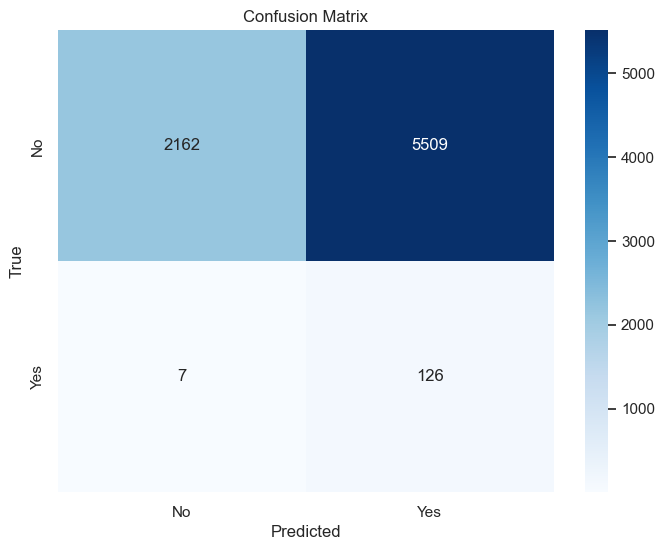

In [275]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined
xgbc_weight = XGBClassifier(random_state=random_seed, verbosity=0, scale_pos_weight=class_weights)

# Define parameter grid for CatBoostClassifier
param_grid = {
    'model__iterations': [100,150,200,250,300],  # Number of boosting iterations
    'model__learning_rate': [0.007, 0.01, 0.1,1,10,100],
    'model__depth': [3,4,5,6,7,8],  # Depth of trees
    'model__subsample': [0.6,0.7,0.8],  # Fraction of samples used for fitting the individual base learners
    'model__scale_pos_weight': [class_weights,class_weights*2,class_weights*3]    
}

# Define model pipeline with sampling strategy and CatBoostClassifier
model_pipeline = ImblearnPipeline([
    ('transformer', column_transformer),
    ('feature_selection', feature_selection_best_k),
    ('model', xgbc_weight)  # CatBoostClassifier
])

# Perform GridSearchCV with cross-validation
xgbc_grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='recall',  # Use 'recall' as the scoring metric
    cv=5,  # 5-fold cross-validation
    verbose=0,
    n_jobs=-1
)

# Fit GridSearchCV
xgbc_grid_search.fit(X_train, y_train)

# Get best parameters and best score
xgbc_best_params = xgbc_grid_search.best_params_
xgbc_best_score = xgbc_grid_search.best_score_

print("Best CV Parameters:", xgbc_best_params)
print("Best CV Recall Score:", xgbc_best_score)

# Predict probabilities on test set with best estimator
xgbc_best_model = xgbc_grid_search.best_estimator_

y_pred_test = xgbc_best_model.predict(X_test)

# Compute recall score for the test set
recall_test = recall_score(y_test, y_pred_test)
print("Recall Score on Test Set:", recall_test)

# Compute F2 score for the test set
f2_score_test = fbeta_score(y_test, y_pred_test, beta=2)
print("F2 Score on Test Set:", f2_score_test)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



## Financial Analysis: Impact of Machine Learning on Insurance Claims

### Premium and Coverage Details
- **Premium**: S$283.55
- **Coverage**: S$15,000
- **Campaign Cost**: S$15 per insured

### Without Machine Learning

#### Total Premium Income
- Formula: `Premium x All Insured`
- Calculation: `283.55 x 7804 = S$2,212,824.2`

#### Total Claim Cost
- Formula: `Claim Insured x Coverage`
- Calculation: `133 x 15000 = S$1,995,000`

#### Total Promo Cost
- Formula: `All Insured x Campaign`
- Calculation: `7804 x 15 = S$117,060`

#### Total Profit
- Formula: `Total Premium Income - Total Claim Cost - Total Promo Cost`
- Calculation: `2,212,824.2 - 1,995,000 - 117,060 = S$100,764.2`

### With Machine Learning

#### Total Premium Income
- Formula: `Premium x (True Negatives + False Negatives)`
- Calculation: `283.55 x (2162 + 7) = S$615,019.95`

#### Total Claim Cost
- Formula: `Claim Insured x Coverage`
- Calculation: `7 x 15000 = S$105,000`

#### Total Promo Cost
- Formula: `All Insured x Campaign`
- Calculation: `7804 x 15 = S$117,060`

#### Total Profit
- Formula: `Total Premium Income - Total Claim Cost - Total Promo Cost`
- Calculation: `615,019.95 - 105,000 - 117,060 = S$392,959.95`

### Summary
By using machine learning, the profit increases from S$100,764.2 to S$392,959.95. This demonstrates a significant improvement in profitability, mainly due to the model's ability to minimize false negatives and thus undetected claims.


### Feature Important

In [ ]:
X_encoded

,Agency_0,Agency_1,Agency_2,Agency_3,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,...,Product Name Category_1,Product Name Category_2,Agency Type_Travel Agency,Distribution Channel_Online,Gender_M,Gender_Not Specified,Net Sales,Duration,Commision (in value),Age
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,365.0,216.0,54.00,57.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,4.0,10.0,0.00,33.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,19.0,22.0,7.70,26.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,20.0,112.0,0.00,59.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,8.0,16.0,4.00,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39015,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,14.0,30.0,0.00,36.0
39016,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,17.0,79.2,47.52,47.0
39017,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,64.0,30.0,10.50,50.0
39018,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,51.0,36.0,0.00,36.0


In [1]:
final_model = xgbc_grid_search.best_estimator_

NameError: name 'xgbc_grid_search' is not defined

In [ ]:
X_feature_selection = X_encoded[['Agency Type_Travel Agency','Gender_Not Specified', 'Agency_2', 'Agency_3' ,'Product Name_3'
,'Product Name_4', 'Product Name Category_2',
 'Duration', 'Net Sales',
 'Commision (in value)']]

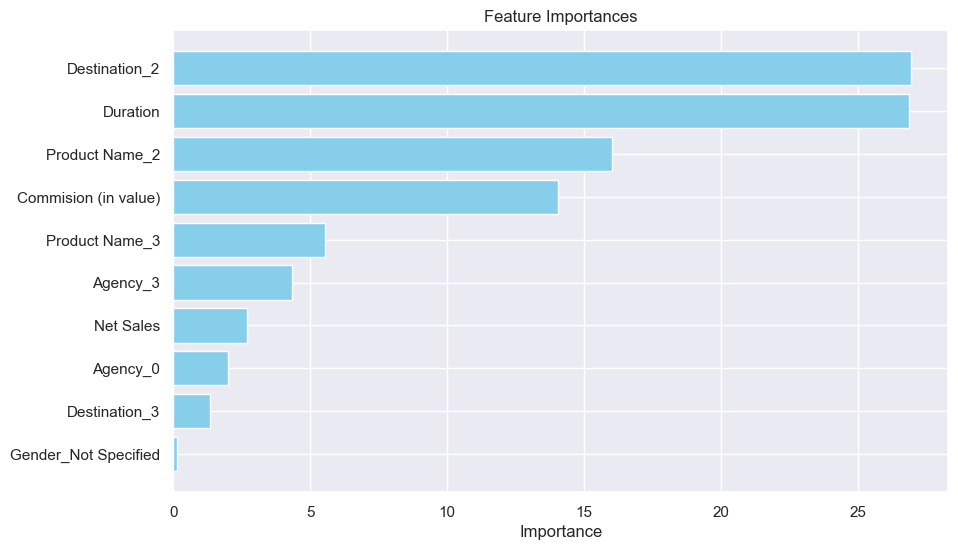

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.pipeline import Pipeline as ImblearnPipeline
from catboost import CatBoostClassifier

# Misalkan `X` dan `y` sudah didefinisikan
# Misalkan `column_transformer` dan `robust` sudah didefinisikan

# SelectKBest untuk memilih fitur terbaik
k = 10  # Sesuaikan dengan jumlah fitur yang diinginkan
select_k_best = SelectKBest(score_func=f_classif, k=k)
X_new = select_k_best.fit_transform(X_encoded, y_encoded)

# Dapatkan nama-nama fitur yang dipilih
selected_feature_indices = select_k_best.get_support(indices=True)
selected_feature_names = np.array(X_encoded.columns)[selected_feature_indices]

# Buat pipeline dengan model final (misalnya CatBoostClassifier)
pipeline = ImblearnPipeline([
    ('transform_columns', column_transformer),
    ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
    ('model', final_model[1])
])

# Fit pipeline dengan data
pipeline.fit(X, y)

# Ekstrak model final dari pipeline
final_model = pipeline.named_steps['model']

# Dapatkan feature importance dari model final
feature_importances = final_model.feature_importances_

# Buat DataFrame untuk feature importances
importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasikan feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


### EXPLAINABLE AI

In [ ]:
import shap
from shap import force_plot

In [ ]:
final_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Gender']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination', 'Continent',
                                                   'Product Name Category'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000017F99F0B020>)])

In [ ]:
# explainer
explainer = shap.Explainer(
    final_model[1].predict,
    final_model[0].transform(X_test)
)

shap_values = explainer(final_model[0].transform(X_test))

PermutationExplainer explainer: 7805it [27:22,  4.73it/s]                          


In [ ]:
# shap values for explain observation in test
i=115
X_test.iloc[i],y_test.iloc[i]

(Agency                                              CWT
 Agency Type                               Travel Agency
 Distribution Channel                             Online
 Product Name            Rental Vehicle Excess Insurance
 Gender                                    Not Specified
 Duration                                            140
 Destination                                       SPAIN
 Net Sales                                           0.0
 Commision (in value)                              23.76
 Age                                                  31
 Name: 36849, dtype: object,
 0)

In [ ]:
[i for i in enumerate(importance_df['Feature'])]

[(0, 'Destination_2'),
 (1, 'Duration'),
 (2, 'Product Name_2'),
 (3, 'Commision (in value)'),
 (4, 'Product Name_3'),
 (5, 'Agency_3'),
 (6, 'Net Sales'),
 (7, 'Agency_0'),
 (8, 'Destination_3'),
 (9, 'Gender_Not Specified')]

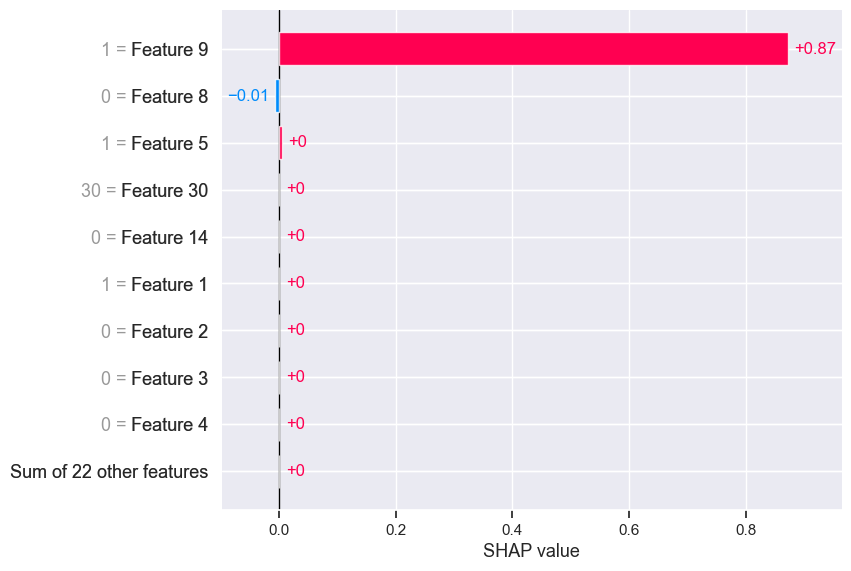

In [ ]:
# shap_values for explain observation in test
shap.plots.bar(shap_values[i])

 99%|===================| 30914/31216 [00:53<00:00]        

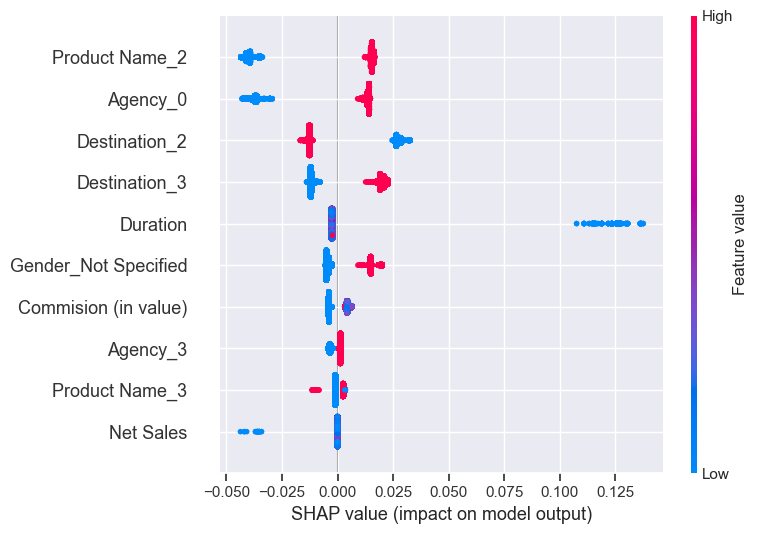

In [ ]:
# shap_values for explain all features in train
X_train_trans = X_train_best_K

# explainer
explainer = shap.TreeExplainer(
    final_model.named_steps['model'],
    data = X_train_trans,
    feature_perturbation= 'interventional',
    model_output= 'probability'
)


# shap values
shap_values = explainer.shap_values(X_train_trans)


# summary plot for model in train
shap.summary_plot(
    shap_values,
    X_train_trans,
    feature_names = X_train_best_K.columns
)

In [ ]:
X_train_best_K.columns

Index(['Agency_0', 'Agency_3', 'Product Name_2', 'Product Name_3',
       'Destination_2', 'Destination_3', 'Gender_Not Specified', 'Net Sales',
       'Duration', 'Commision (in value)'],
      dtype='object')

In [ ]:
import lime
from lime import lime_tabular

In [ ]:
import lime.lime_tabular

# Initialize LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train_best_K.values,
    feature_names = X_train_best_K.columns.tolist(),
    class_names = ['Not Claim', 'Claim'],
    mode = 'classification'
)

explainer


In [2]:
final_model[1].predict_proba

NameError: name 'final_model' is not defined

In [ ]:
# lets compare the real result
i = 3

print(f'The prediction of this customer is: {('Do Not Claim' if y_test.iloc[i]== 1 else 'Claim')} --> from y_test') 
exp = explainer.explain_instance(
    X_train_best_K.iloc[i],
    final_model[2].predict_proba,
    num_features= 10
)
exp.show_in_notebook(show_table = True)

The prediction of this customer is: Claim --> from y_test


In [ ]:
# lets compare the real result
i = 1

print(f'The prediction of this customer is: {('Claim' if y_test.iloc[i]== 1 else 'Do Not Claim')} --> from y_test') 
exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    model_final['model'].predict_proba,
    num_features= 12
)
exp.show_in_notebook(show_table = True)

## Model Deploy

### Splitting

In [ ]:
X = df_eda.drop(['Claim','Continent','Product Name Category'], axis=1)
y = df_eda['Claim']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42)


### Add New Features

In [ ]:
continent_map = {
    'SINGAPORE': 'Asia',
    'MALAYSIA': 'Asia',
    'INDIA': 'Asia',
    'UNITED STATES': 'North America',
    'KOREA, REPUBLIC OF': 'Asia',
    'THAILAND': 'Asia',
    'GERMANY': 'Europe',
    'JAPAN': 'Asia',
    'INDONESIA': 'Asia',
    'VIET NAM': 'Asia',
    'AUSTRALIA': 'Oceania',
    'FINLAND': 'Europe',
    'UNITED KINGDOM': 'Europe',
    'SRI LANKA': 'Asia',
    'SPAIN': 'Europe',
    'HONG KONG': 'Asia',
    'MACAO': 'Asia',
    'CHINA': 'Asia',
    'UNITED ARAB EMIRATES': 'Asia',
    'IRAN, ISLAMIC REPUBLIC OF': 'Asia',
    'TAIWAN, PROVINCE OF CHINA': 'Asia',
    'POLAND': 'Europe',
    'CANADA': 'North America',
    'OMAN': 'Asia',
    'PHILIPPINES': 'Asia',
    'GREECE': 'Europe',
    'BELGIUM': 'Europe',
    'TURKEY': 'Asia',
    'BRUNEI DARUSSALAM': 'Asia',
    'DENMARK': 'Europe',
    'SWITZERLAND': 'Europe',
    'NETHERLANDS': 'Europe',
    'SWEDEN': 'Europe',
    'MYANMAR': 'Asia',
    'KENYA': 'Africa',
    'CZECH REPUBLIC': 'Europe',
    'FRANCE': 'Europe',
    'RUSSIAN FEDERATION': 'Europe',
    'PAKISTAN': 'Asia',
    'ARGENTINA': 'South America',
    'TANZANIA, UNITED REPUBLIC OF': 'Africa',
    'SERBIA': 'Europe',
    'ITALY': 'Europe',
    'CROATIA': 'Europe',
    'NEW ZEALAND': 'Oceania',
    'PERU': 'South America',
    'MONGOLIA': 'Asia',
    'CAMBODIA': 'Asia',
    'QATAR': 'Asia',
    'NORWAY': 'Europe',
    'LUXEMBOURG': 'Europe',
    'MALTA': 'Europe',
    "LAO PEOPLE'S DEMOCRATIC REPUBLIC": 'Asia',
    'ISRAEL': 'Asia',
    'SAUDI ARABIA': 'Asia',
    'AUSTRIA': 'Europe',
    'PORTUGAL': 'Europe',
    'NEPAL': 'Asia',
    'UKRAINE': 'Europe',
    'ESTONIA': 'Europe',
    'ICELAND': 'Europe',
    'BRAZIL': 'South America',
    'MEXICO': 'North America',
    'CAYMAN ISLANDS': 'North America',
    'PANAMA': 'North America',
    'BANGLADESH': 'Asia',
    'TURKMENISTAN': 'Asia',
    'BAHRAIN': 'Asia',
    'KAZAKHSTAN': 'Asia',
    'TUNISIA': 'Africa',
    'IRELAND': 'Europe',
    'ETHIOPIA': 'Africa',
    'NORTHERN MARIANA ISLANDS': 'Oceania',
    'MALDIVES': 'Asia',
    'SOUTH AFRICA': 'Africa',
    'VENEZUELA': 'South America',
    'COSTA RICA': 'North America',
    'JORDAN': 'Asia',
    'MALI': 'Africa',
    'CYPRUS': 'Europe',
    'MAURITIUS': 'Africa',
    'LEBANON': 'Asia',
    'KUWAIT': 'Asia',
    'AZERBAIJAN': 'Asia',
    'HUNGARY': 'Europe',
    'BHUTAN': 'Asia',
    'BELARUS': 'Europe',
    'MOROCCO': 'Africa',
    'ECUADOR': 'South America',
    'UZBEKISTAN': 'Asia',
    'CHILE': 'South America',
    'FIJI': 'Oceania',
    'PAPUA NEW GUINEA': 'Oceania',
    'ANGOLA': 'Africa',
    'FRENCH POLYNESIA': 'Oceania',
    'NIGERIA': 'Africa',
    'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF': 'Europe',
    'NAMIBIA': 'Africa',
    'GEORGIA': 'Asia',
    'COLOMBIA': 'South America',
    'SLOVENIA': 'Europe',
    'EGYPT': 'Africa',
    'ZIMBABWE': 'Africa',
    'BULGARIA': 'Europe',
    'BERMUDA': 'North America',
    'URUGUAY': 'South America',
    'GUINEA': 'Africa',
    'GHANA': 'Africa',
    'BOLIVIA': 'South America',
    'TRINIDAD AND TOBAGO': 'North America',
    'VANUATU': 'Oceania',
    'GUAM': 'Oceania',
    'UGANDA': 'Africa',
    'JAMAICA': 'North America',
    'LATVIA': 'Europe',
    'ROMANIA': 'Europe',
    'REPUBLIC OF MONTENEGRO': 'Europe',
    'KYRGYZSTAN': 'Asia',
    'GUADELOUPE': 'North America',
    'ZAMBIA': 'Africa',
    'RWANDA': 'Africa',
    'BOTSWANA': 'Africa',
    'GUYANA': 'South America',
    'LITHUANIA': 'Europe',
    'GUINEA-BISSAU': 'Africa',
    'SENEGAL': 'Africa',
    'CAMEROON': 'Africa',
    'SAMOA': 'Oceania',
    'PUERTO RICO': 'North America',
    'TAJIKISTAN': 'Asia',
    'ARMENIA': 'Asia',
    'FAROE ISLANDS': 'Europe',
    'DOMINICAN REPUBLIC': 'North America',
    'MOLDOVA, REPUBLIC OF': 'Europe',
    'BENIN': 'Africa',
    'REUNION': 'Africa',
    "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF": 'Asia',
    'TIBET': 'Asia'
}

mapping = {
    'Annual Silver Plan': 'Annual Plans',
    'Cancellation Plan': 'Specialized Plans',
    'Basic Plan': 'Basic Plans',
    '2 way Comprehensive Plan': 'Comprehensive Plans',
    'Bronze Plan': 'Other',
    '1 way Comprehensive Plan': 'Comprehensive Plans',
    'Rental Vehicle Excess Insurance': 'Specialized Plans',
    'Single Trip Travel Protect Gold': 'Other Plans',
    'Silver Plan': 'Other Plans',
    'Value Plan': 'Basic Plans',
    '24 Protect': 'Other Plans',
    'Annual Travel Protect Gold': 'Annual Plans',
    'Comprehensive Plan': 'Other',
    'Ticket Protector': 'Specialized Plans',
    'Travel Cruise Protect': 'Specialized Plans',
    'Single Trip Travel Protect Silver': 'Other Plans',
    'Individual Comprehensive Plan': 'Comprehensive Plans',
    'Gold Plan': 'Other Plans',
    'Annual Gold Plan': 'Annual Plans',
    'Child Comprehensive Plan': 'Comprehensive Plans',
    'Premier Plan': 'Basic Plans',
    'Annual Travel Protect Silver': 'Annual Plans',
    'Single Trip Travel Protect Platinum': 'Other Plans',
    'Annual Travel Protect Platinum': 'Annual Plans',
    'Spouse or Parents Comprehensive Plan': 'Other Plans',
    'Travel Cruise Protect Family': 'Specialized Plans'
}


# Custom function to add a new column for Continent
def add_new_column_continent(X):
    X = X.copy()
    X['Continent'] = X['Destination'].apply(lambda dest: continent_map.get(dest, 'Unknown'))
    return X

# Custom function to add a new column for Product Name Category
def add_new_column_product_name_category(Y):
    Y = Y.copy()
    Y['Product Name Category'] = Y['Product Name'].apply(lambda prod: mapping.get(prod, 'Unknown'))
    return Y


# FunctionTransformer to add a new column for Continent
add_column_transformer_continent = FunctionTransformer(add_new_column_continent, validate=False)

# FunctionTransformer to add a new column for Product Name Category
add_column_transformer_category = FunctionTransformer(add_new_column_product_name_category, validate=False)

### Add Imputer for Missing Value

In [ ]:
# Define your gender pipeline
gender_pipeline = SKPipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not Specified')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


### Transformer

In [ ]:
# Define your main column transformer
column_transformer = ColumnTransformer([
    ('gender_pipeline', gender_pipeline, ['Gender']),
    ('continent_pipeline', SKPipeline([
        ('add_columns', add_column_transformer_continent),
        ('encoder', BinaryEncoder(handle_unknown='ignore'))
    ]), ['Destination']),
    ('category_pipeline', SKPipeline([
        ('add_columns', add_column_transformer_category),
        ('encoder', BinaryEncoder(handle_unknown='ignore'))
    ]), ['Product Name']),
    ('onehot', OneHotEncoder(), ['Agency Type', 'Distribution Channel']),
    ('binary', BinaryEncoder(), ['Agency', 'Product Name', 'Destination'])
], remainder='passthrough')


### Making Model

In [ ]:
# Assuming X_train, X_test, y_train, y_test are already defined
xgbc_weight_final = XGBClassifier(random_state=random_seed, verbosity=0, scale_pos_weight=class_weights)
# Define parameter grid for CatBoostClassifier
param_grid = {
    'model__iterations': [250],  # Number of boosting iterations
    'model__learning_rate': [0.007],
    'model__depth': [3],  # Depth of trees
    'model__subsample': [0.5],  # Fraction of samples used for fitting the individual base learners
    'model__scale_pos_weight': [class_weights*3]  # Adjust scale_pos_weight based on your imbalance ratio
}

# Define model pipeline with sampling strategy and CatBoostClassifier
model_pipeline = ImblearnPipeline([
    ('transformer', column_transformer),
    ('model', xgbc_weight_final)  # CatBoostClassifier
])

# Perform GridSearchCV with cross-validation
final_xgb_grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='recall',  # Use 'recall' as the scoring metric
    cv=5,  # 5-fold cross-validation
    verbose=0,
    n_jobs=-1
)

# Fit GridSearchCV
final_xgb_grid_search.fit(X_train, y_train)

# Get best parameters and best score
final_xgb_best_params = final_xgb_grid_search.best_params_
final_xgb_best_score = final_xgb_grid_search.best_score_

print("Best CV Parameters:", final_xgb_best_params)
print("Best CV Recall Score:", final_xgb_best_score)

# Predict probabilities on test set with best estimator
xgb_best_model = final_xgb_grid_search.best_estimator_

y_pred_test = xgb_best_model.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Best CV Parameters: {'model__depth': 3, 'model__iterations': 250, 'model__learning_rate': 0.007, 'model__scale_pos_weight': 175.37078651685394, 'model__subsample': 0.5}
Best CV Recall Score: 0.9176335743255157
Confusion Matrix:
[[2513 5158]
 [   6  127]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.49      7671
           1       0.02      0.95      0.05       133

    accuracy                           0.34      7804
   macro avg       0.51      0.64      0.27      7804
weighted avg       0.98      0.34      0.49      7804



In [ ]:
final_model_xgb = final_xgb_grid_search.best_estimator_

In [ ]:
final_model_xgb

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Specified',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender']),
                                                 ('continent_pipeline',
                                                  Pipeline(steps=[('add_columns',
                                                                   FunctionTransformer(func=<function a...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, iterations=250,
                               learning_rate=0.007, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, ...))])

### Saving Model

In [ ]:
import pickle

# Save the model using pickle
with open('model/final_model_xgb.pkl', 'wb') as f:
    pickle.dump(final_model_xgb, f)

# # Load the model using pickle
# with open('model/model3.pkl', 'rb') as f:
#     final_model_xgb = pickle.load(f)

# Now you can use loaded_model1 to make predictions
# For example: y_pred = loaded_model1.predict(X_test)


In [ ]:

new_X = new_df.drop(columns=['Claim'])
new_y = new_df['Claim']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    new_X,
    new_y,
    stratify=new_y,
    test_size=0.2,
    random_state= random_seed
)

In [ ]:
X_test_new.to_csv('model/X_test_new.csv', index=False)

In [ ]:
new_df = pd.read_csv(r'C:\Users\ivans\OneDrive\Documents\practice\NUMPY\Practice\ML\dataset\data_travel_insurance.csv')
new_df.head(5).style.set_properties(**{"background-color": "#54BAB9","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.000000,54.000000,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,nan,4,MALAYSIA,10.000000,0.000000,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.000000,7.700000,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,nan,20,UNITED STATES,112.000000,0.000000,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.000000,4.000000,28,No


In [ ]:
pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
branca                    0.7.2
catboost                  1.2.5
category-encoders         2.6.3
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpickle               3.0.0
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
dask                      2024.5.2
dask-expr                 1.1.2
debugpy                   1.8.1
decorator                 5.1.1
defusedxml      